# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [219]:
import pandas as pd

df_health = pd.read_csv("data/mental_health_analysis.csv")
df_health.head()

User_ID  Age Gender  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1   16      F            9.654486        2.458001     5.198926   
1        2   17      M            9.158143        0.392095     8.866097   
2        3   15      M            5.028755        0.520119     4.943095   
3        4   17      F            7.951103        1.022630     5.262773   
4        5   17      F            1.357459        1.225462     6.196080   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           8.158189                    3               0.288962   
1           5.151993                    5               0.409446   
2           9.209325                    2               0.423837   
3           9.823658                    5               0.666021   
4          11.338990                    5               0.928060   

  Support_System Academic_Performance  
0       Moderate            Excellent  
1       Moderate                 Good  
2       Moderate                 Poor  
3       Moderate              Average  
4           High                 Poor

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [220]:
#1. Memahami Struktur Data
# Menampilkan Informasi dari dataset
print('Informasi Tentang Dataset')
df_health.info()

Informasi Tentang Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   Social_Media_Hours     5000 non-null   float64
 4   Exercise_Hours         5000 non-null   float64
 5   Sleep_Hours            5000 non-null   float64
 6   Screen_Time_Hours      5000 non-null   float64
 7   Survey_Stress_Score    5000 non-null   int64  
 8   Wearable_Stress_Score  5000 non-null   float64
 9   Support_System         5000 non-null   object 
 10  Academic_Performance   5000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


In [221]:
# Menampilkan statistik deskriptif dari dataset
df_health.describe(include="all")

User_ID          Age Gender  Social_Media_Hours  Exercise_Hours  \
count   5000.000000  5000.000000   5000         5000.000000     5000.000000   
unique          NaN          NaN      2                 NaN             NaN   
top             NaN          NaN      F                 NaN             NaN   
freq            NaN          NaN   2528                 NaN             NaN   
mean    2500.500000    15.493200    NaN            4.932081        1.498151   
std     1443.520003     1.715151    NaN            2.853928        0.873984   
min        1.000000    13.000000    NaN            0.000528        0.000473   
25%     1250.750000    14.000000    NaN            2.473150        0.734431   
50%     2500.500000    16.000000    NaN            4.898176        1.483432   
75%     3750.250000    17.000000    NaN            7.369195        2.276089   
max     5000.000000    18.000000    NaN            9.995052        2.999774   

        Sleep_Hours  Screen_Time_Hours  Survey_Stress_Score  \
count   5000.000000        5000.000000          5000.000000   
unique          NaN                NaN                  NaN   
top             NaN                NaN                  NaN   
freq            NaN                NaN                  NaN   
mean       7.057370           7.068630             3.015800   
std        1.722211           2.883494             1.414762   
min        4.001515           2.000481             1.000000   
25%        5.611836           4.574327             2.000000   
50%        7.068874           7.118979             3.000000   
75%        8.519411           9.526335             4.000000   
max        9.999229          11.999010             5.000000   

        Wearable_Stress_Score Support_System Academic_Performance  
count             5000.000000           5000                 5000  
unique                    NaN              3                    4  
top                       NaN       Moderate                 Poor  
freq                      NaN           1696                 1293  
mean                 0.496618            NaN                  NaN  
std                  0.289768            NaN                  NaN  
min                  0.000102            NaN                  NaN  
25%                  0.244615            NaN                  NaN  
50%                  0.500404            NaN                  NaN  
75%                  0.749929            NaN                  NaN  
max                  0.999812            NaN                  NaN

In [222]:
df_health.describe()

User_ID          Age  Social_Media_Hours  Exercise_Hours  \
count  5000.000000  5000.000000         5000.000000     5000.000000   
mean   2500.500000    15.493200            4.932081        1.498151   
std    1443.520003     1.715151            2.853928        0.873984   
min       1.000000    13.000000            0.000528        0.000473   
25%    1250.750000    14.000000            2.473150        0.734431   
50%    2500.500000    16.000000            4.898176        1.483432   
75%    3750.250000    17.000000            7.369195        2.276089   
max    5000.000000    18.000000            9.995052        2.999774   

       Sleep_Hours  Screen_Time_Hours  Survey_Stress_Score  \
count  5000.000000        5000.000000          5000.000000   
mean      7.057370           7.068630             3.015800   
std       1.722211           2.883494             1.414762   
min       4.001515           2.000481             1.000000   
25%       5.611836           4.574327             2.000000   
50%       7.068874           7.118979             3.000000   
75%       8.519411           9.526335             4.000000   
max       9.999229          11.999010             5.000000   

       Wearable_Stress_Score  
count            5000.000000  
mean                0.496618  
std                 0.289768  
min                 0.000102  
25%                 0.244615  
50%                 0.500404  
75%                 0.749929  
max                 0.999812

In [223]:
#2. Menangani Data Yang Hilang
# Memeriksa jumlah nilai yang hilang di setiap kolom
print('Memeriksa Missing Values')
df_health.isnull().sum()

Memeriksa Missing Values


User_ID                  0
Age                      0
Gender                   0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
dtype: int64

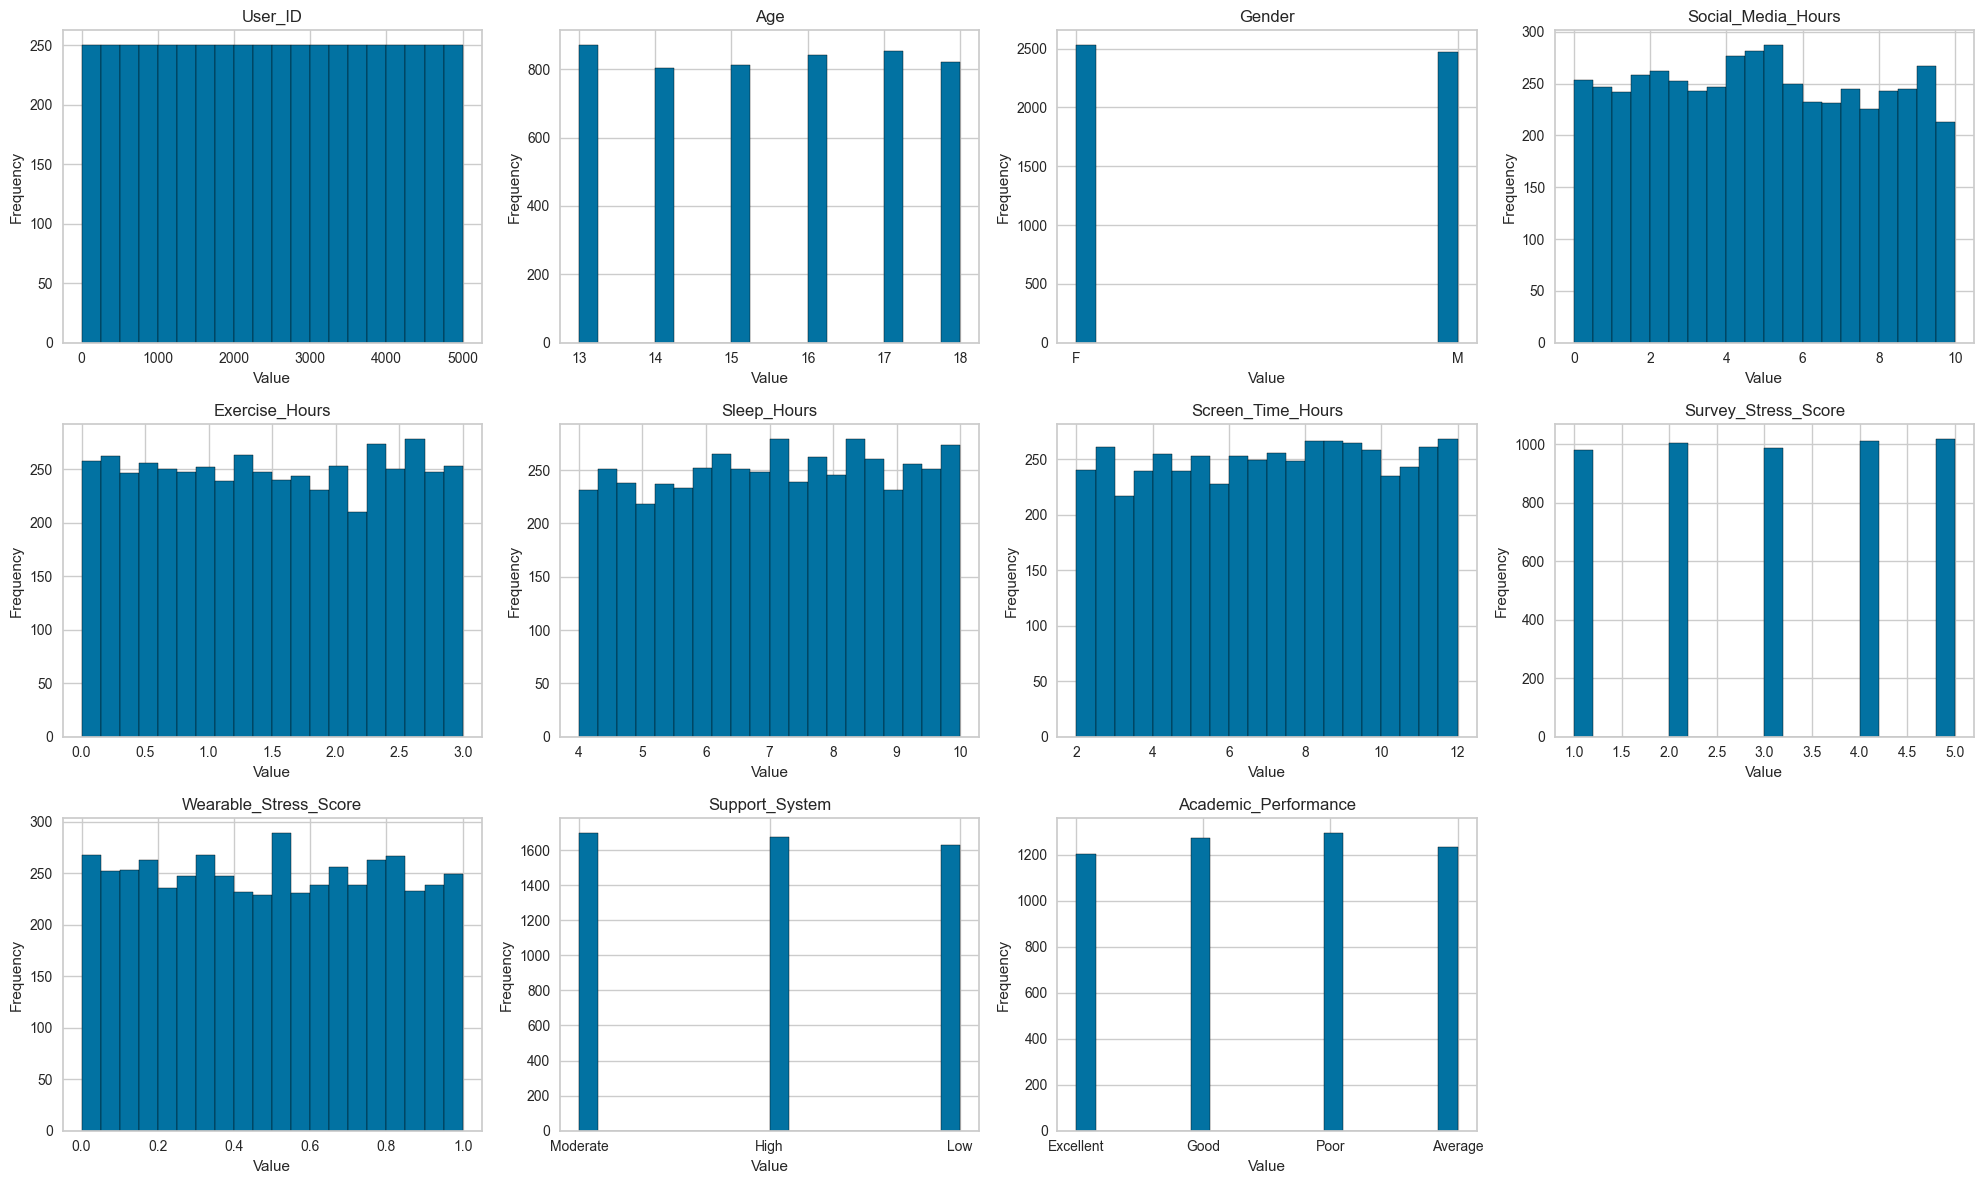

In [224]:
#3. Analisis Distribusi dan Korelasi
# Menghitung jumlah variabel
num_vars = df_health.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(df_health.columns):
    df_health[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

Cek Outlier


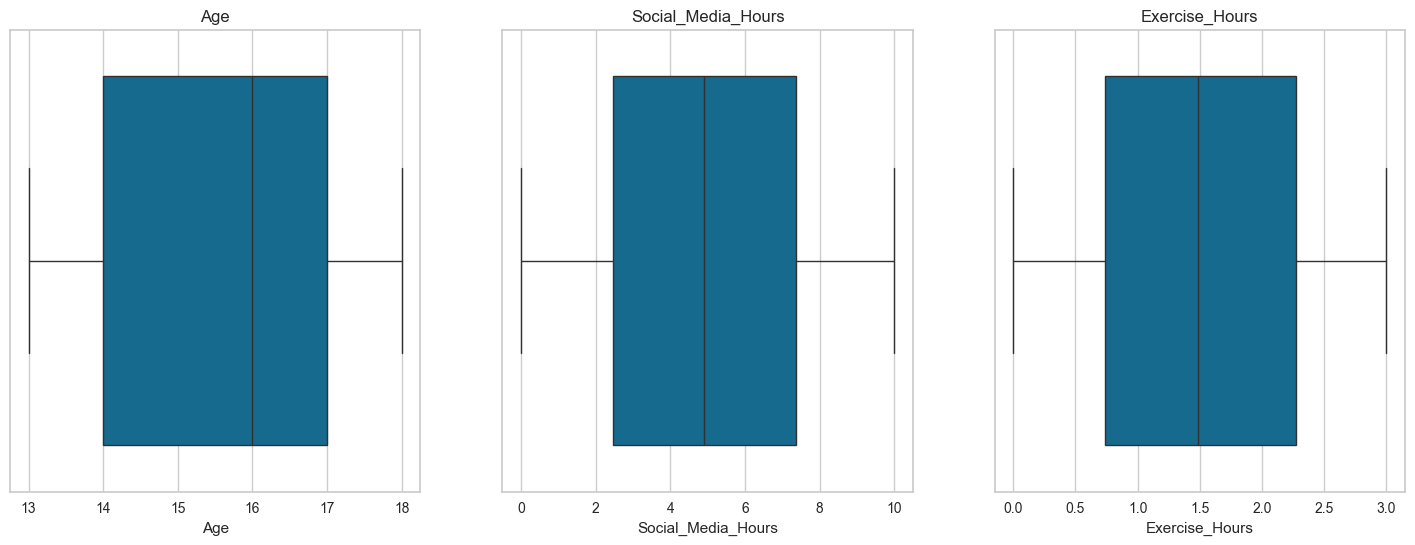

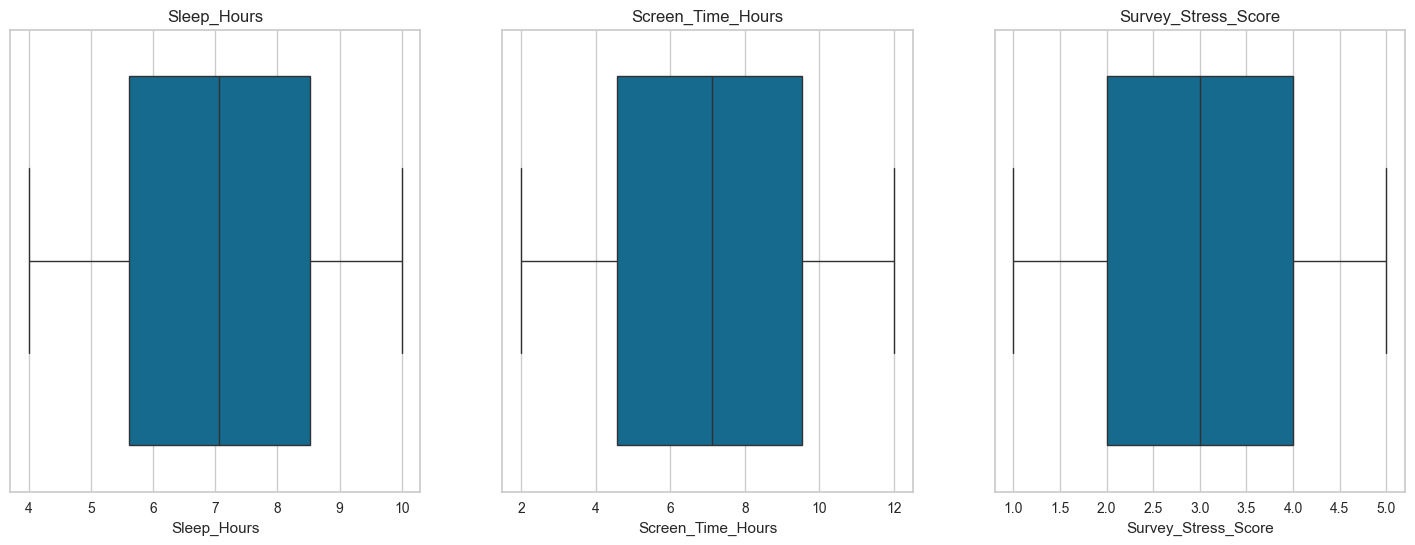

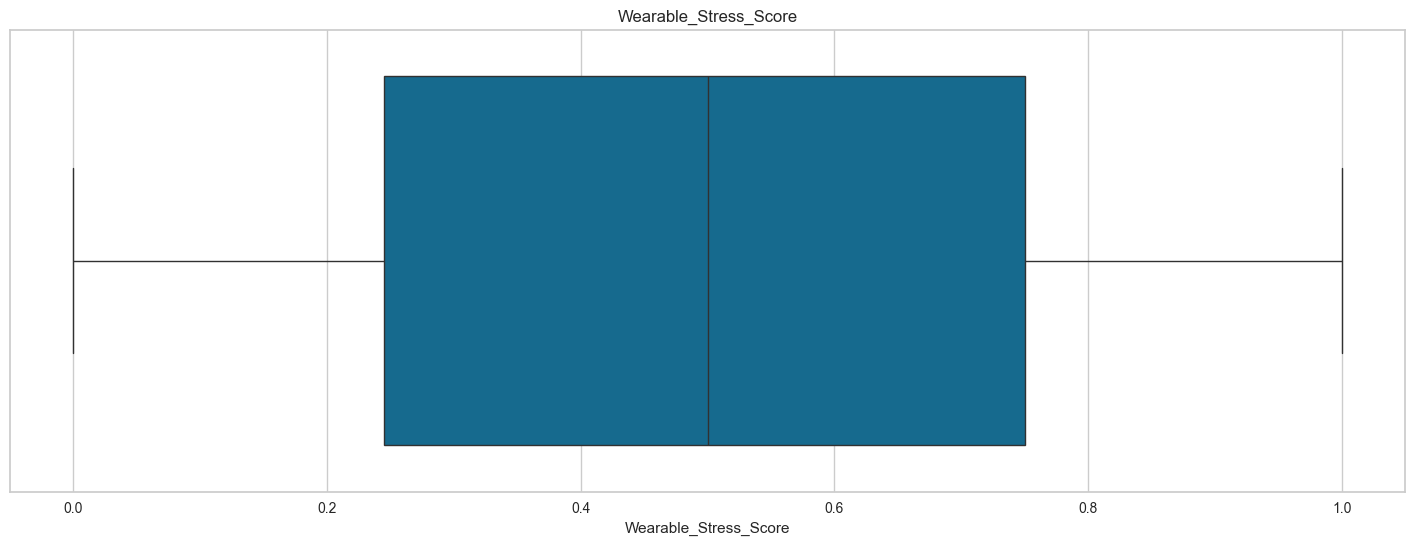

Cek Grafik Sebaran Data


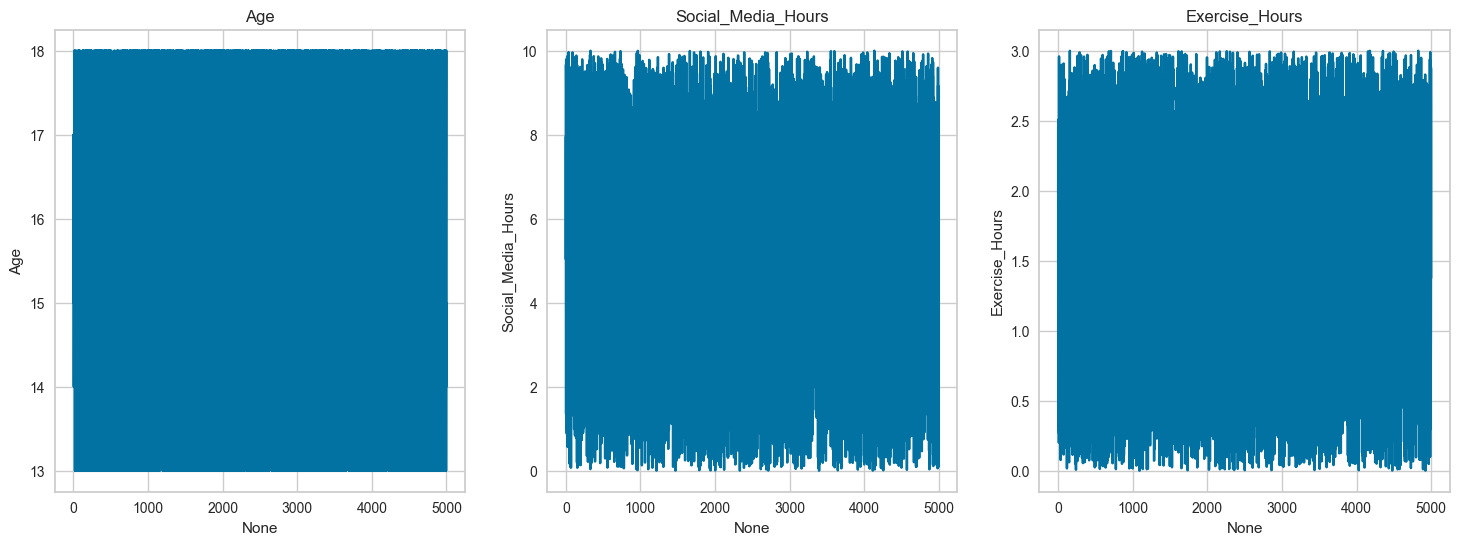

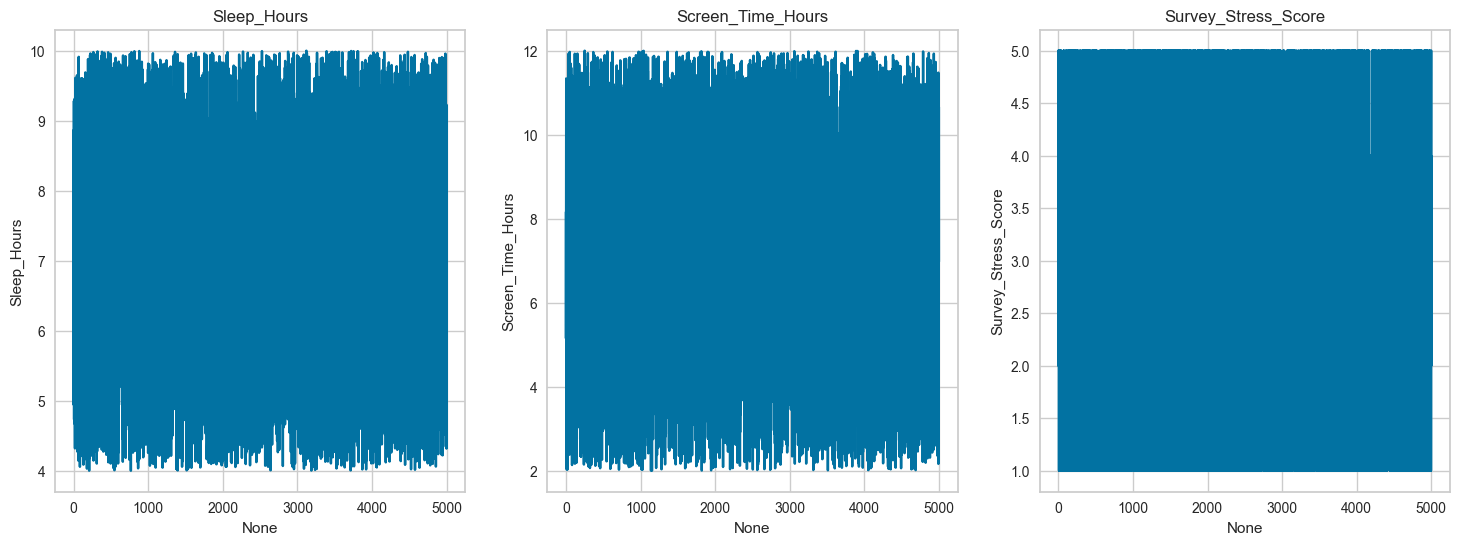

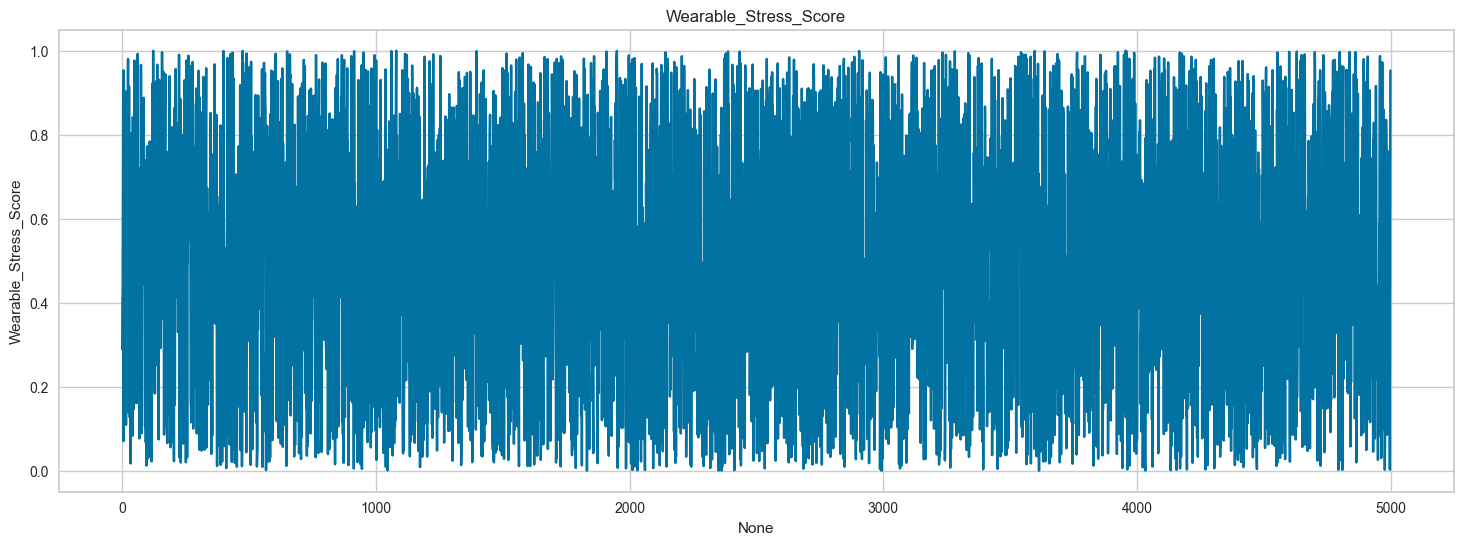

In [225]:
#cek outlier pada data numerik
print('Cek Outlier')
cols_numerik = ['Age', 'Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours', 'Survey_Stress_Score', 'Wearable_Stress_Score']

# Bagi menjadi grup untuk menampilkan 3 gambar dalam satu baris
num_cols = len(cols_numerik)
cols_per_row = 3

for i in range(0, num_cols, cols_per_row):
    sub_cols = cols_numerik[i:i+cols_per_row]  # Ambil subset kolom
    fig, axes = plt.subplots(1, len(sub_cols), figsize=(18, 6))

    if len(sub_cols) == 1:  # Jika hanya satu kolom, 'axes' bukan array
        axes = [axes]  # Konversi jadi list agar bisa diakses dengan indeks
    
    for j, feature in enumerate(sub_cols):
        sns.boxplot(x=df_health[feature], ax=axes[j])
        axes[j].set_title(feature)

    plt.show()

#cek grafik sebaran data
print('Cek Grafik Sebaran Data')

for i in range(0, num_cols, cols_per_row):
    sub_cols = cols_numerik[i:i+cols_per_row]  # Ambil subset kolom
    fig, axes = plt.subplots(1, len(sub_cols), figsize=(18, 6))

    if len(sub_cols) == 1:
        axes = [axes]  # Konversi menjadi list jika hanya satu kolom

    for j, feature in enumerate(sub_cols):
        sns.lineplot(x=df_health.index, y=df_health[feature], ax=axes[j])
        axes[j].set_title(feature)

    plt.show()

Cek Distribusi Data


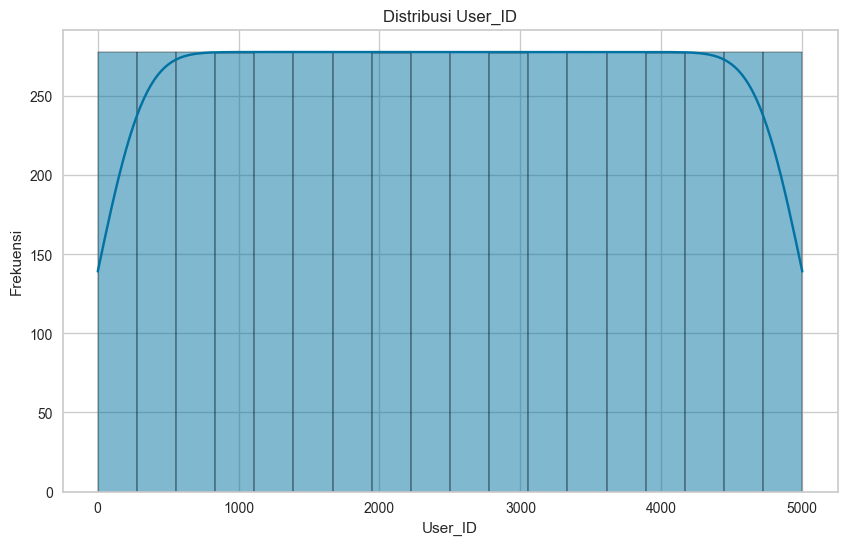

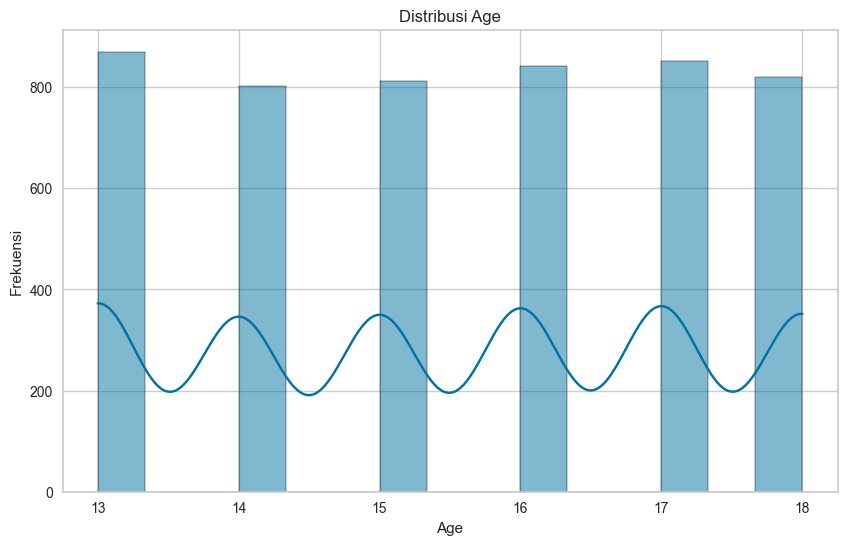

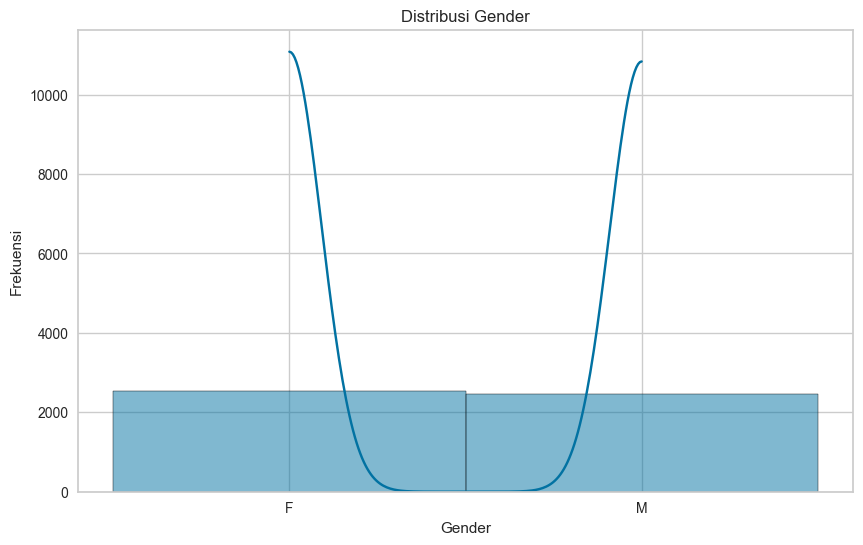

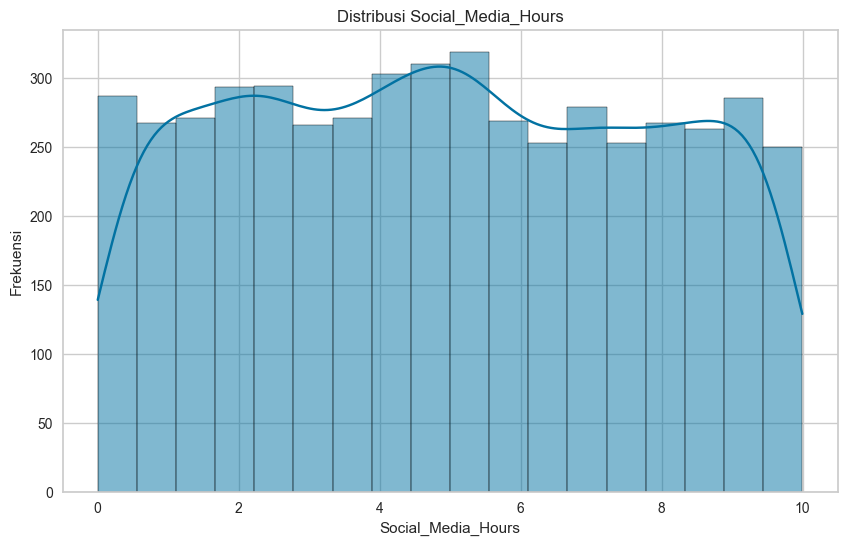

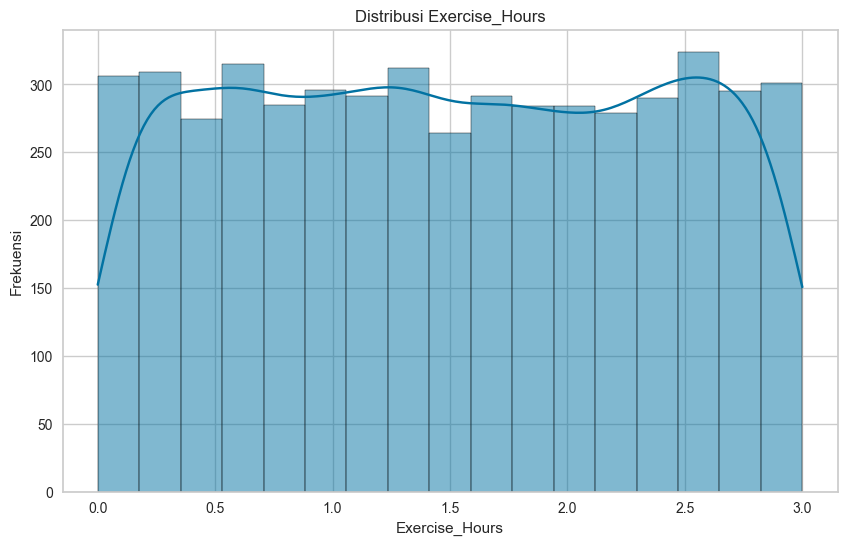

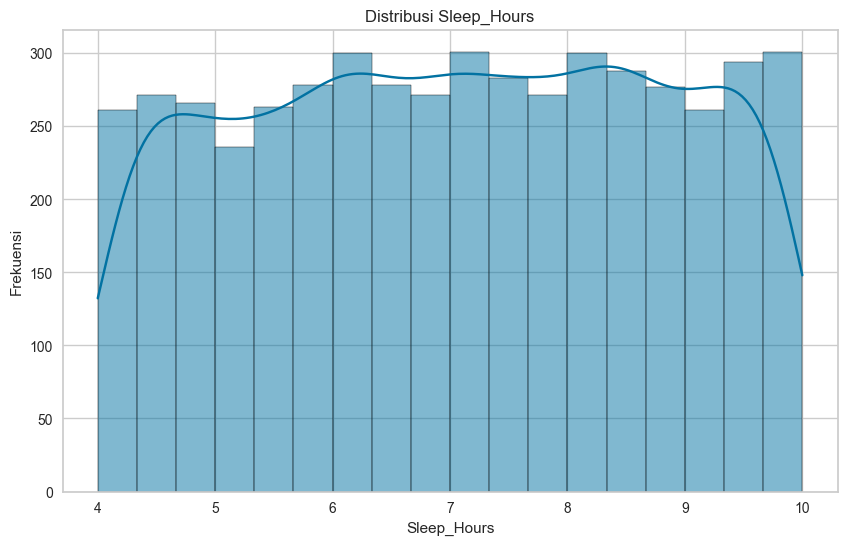

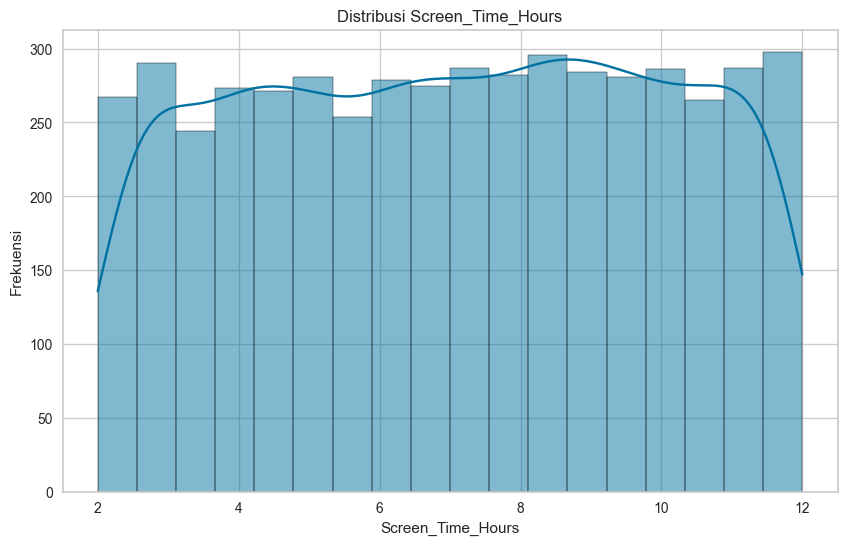

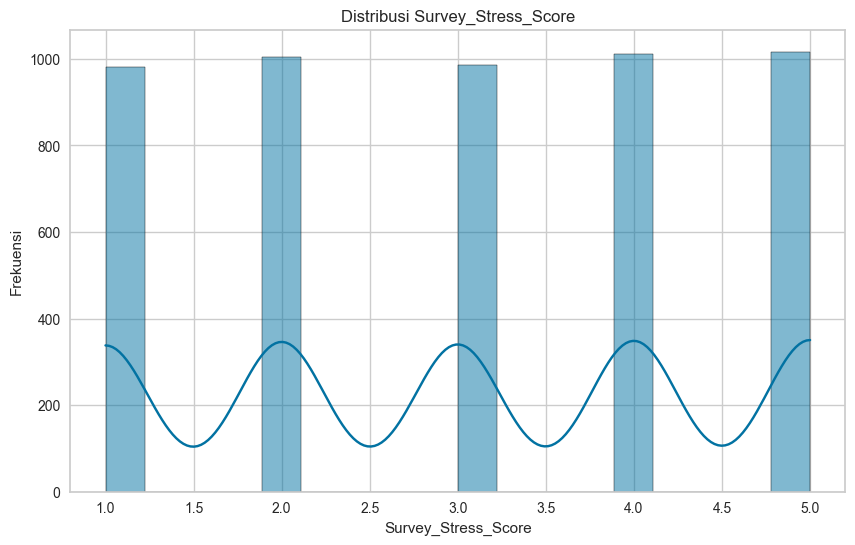

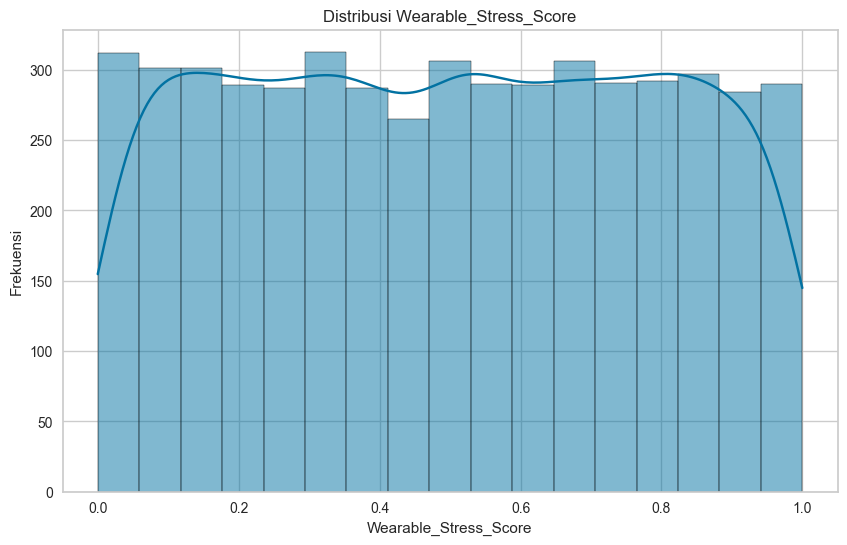

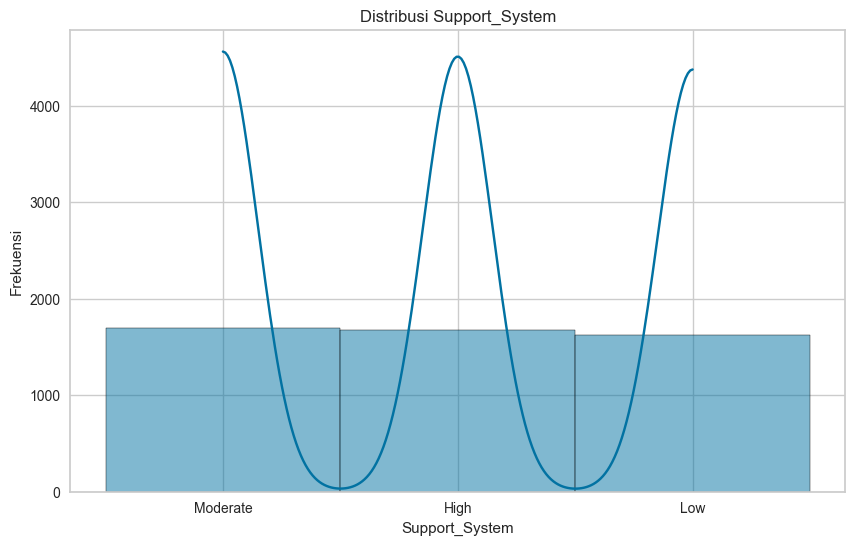

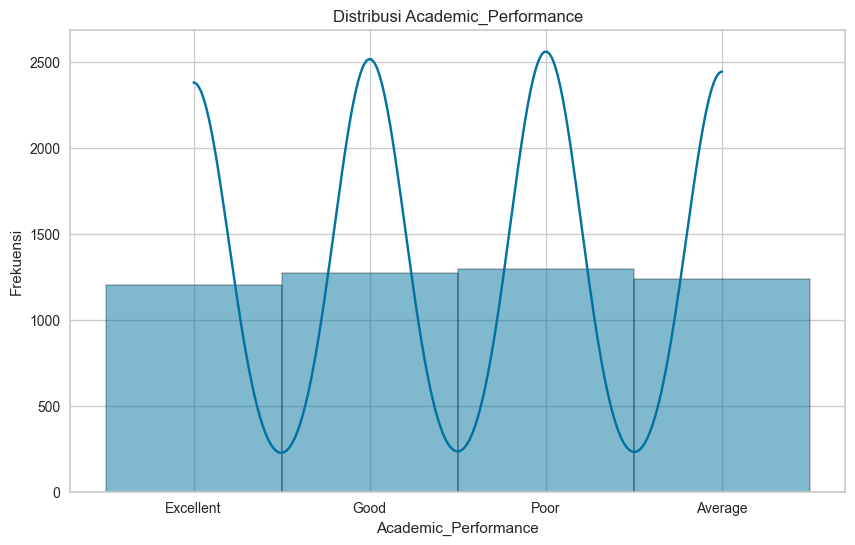

In [9]:
#cek distribusi data
print('Cek Distribusi Data')
for feature in df_health.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df_health[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

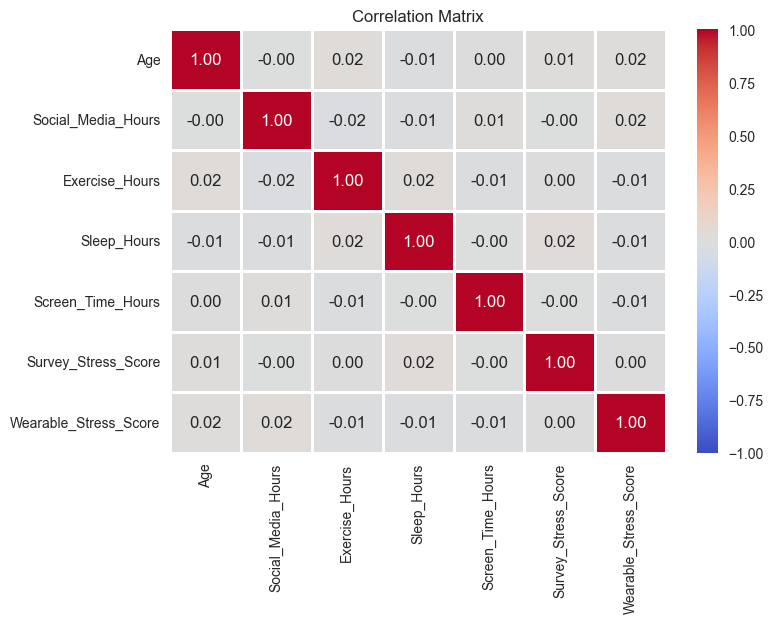

In [226]:
#cek korelasi antar data numerik
plt.Figure(figsize=(12,10))
sns.heatmap(df_health[cols_numerik].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=2, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

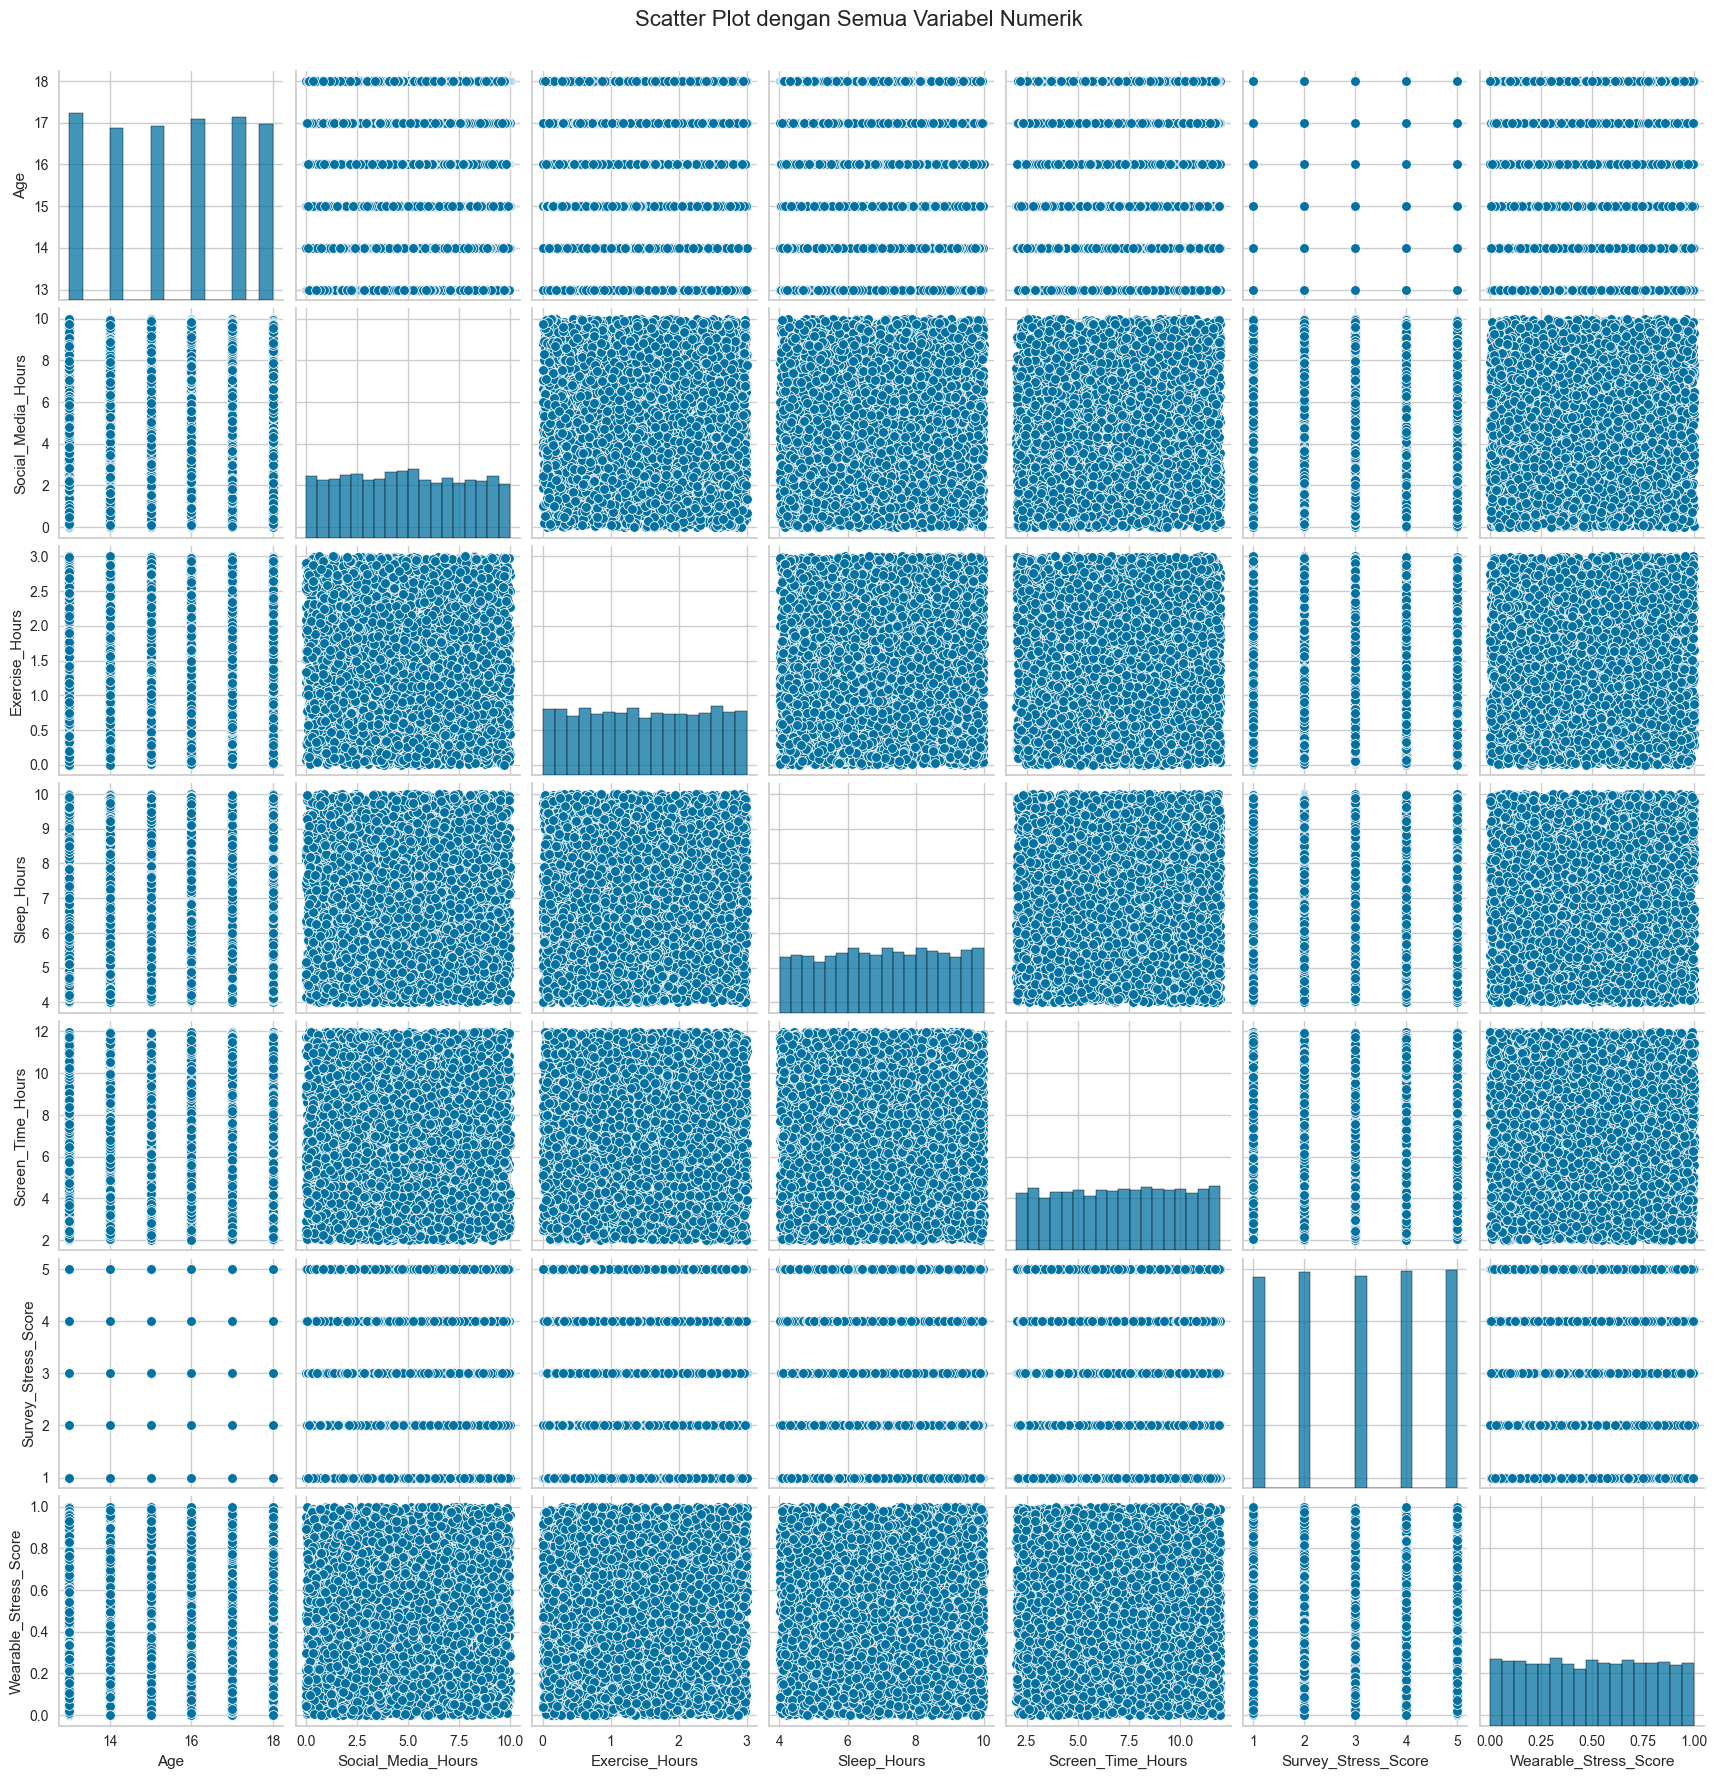

In [227]:
sns.pairplot(df_health[cols_numerik])
plt.suptitle('Scatter Plot dengan Semua Variabel Numerik', fontsize=16, y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [228]:
# Menghapus Data Kosong (Missing Value)
df_health.isna().sum()

User_ID                  0
Age                      0
Gender                   0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
dtype: int64

In [229]:
# Data Duplikat
print('Jumlah Duplikasi : ', df_health.duplicated().sum())

Jumlah Duplikasi :  0


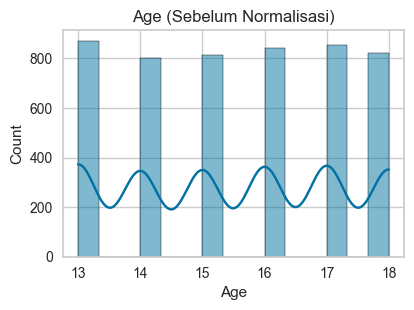

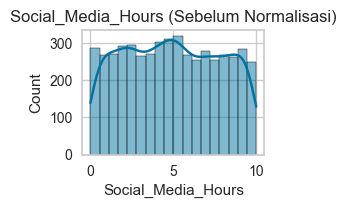

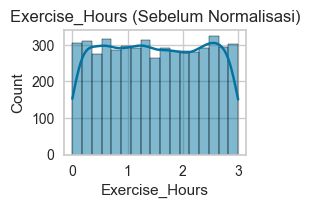

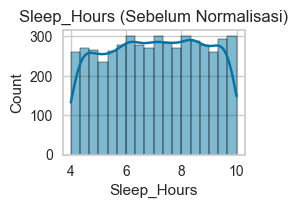

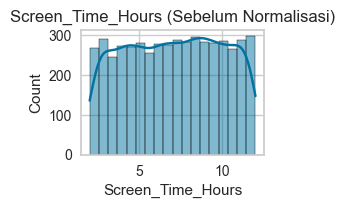

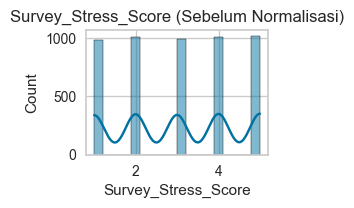

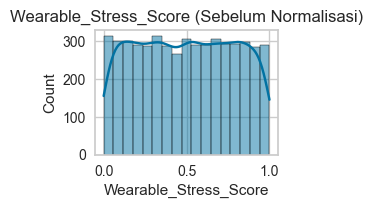

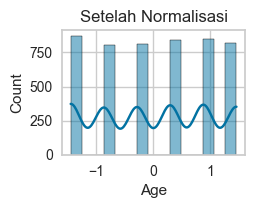

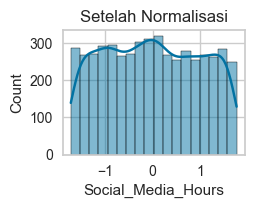

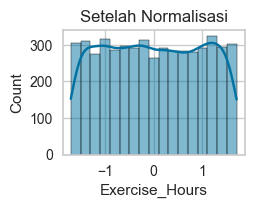

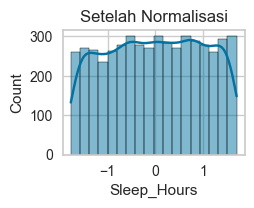

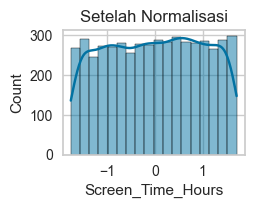

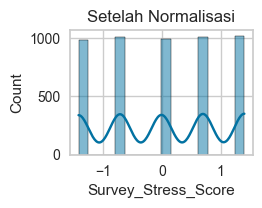

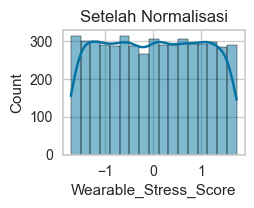

Jumlah outlier yang dihapus: 0
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   Social_Media_Hours     5000 non-null   float64
 4   Exercise_Hours         5000 non-null   float64
 5   Sleep_Hours            5000 non-null   float64
 6   Screen_Time_Hours      5000 non-null   float64
 7   Survey_Stress_Score    5000 non-null   int64  
 8   Wearable_Stress_Score  5000 non-null   float64
 9   Support_System         5000 non-null   object 
 10  Academic_Performance   5000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 468.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column         

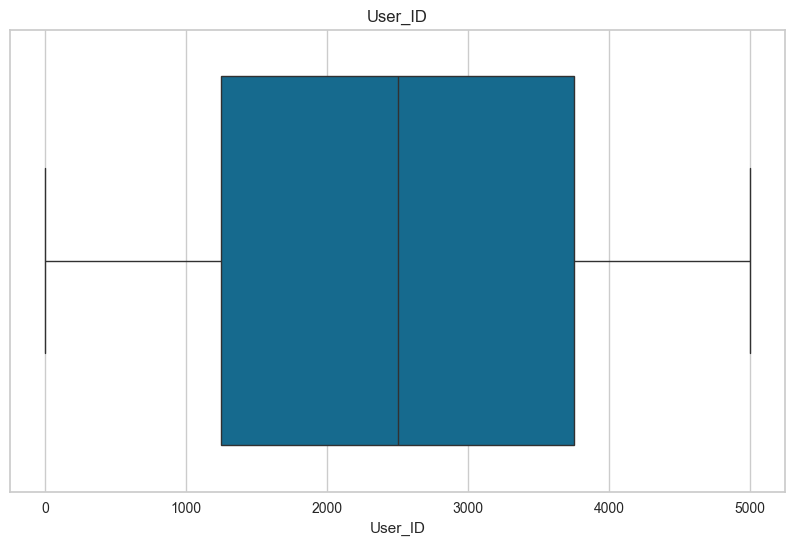

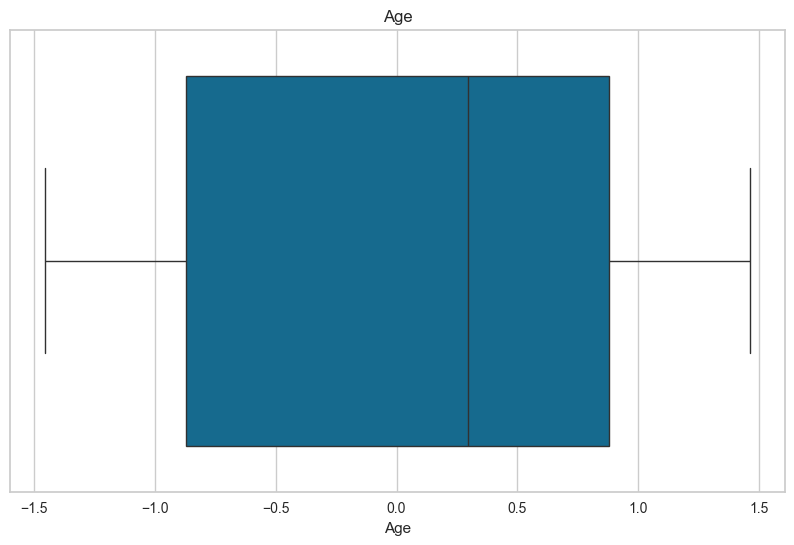

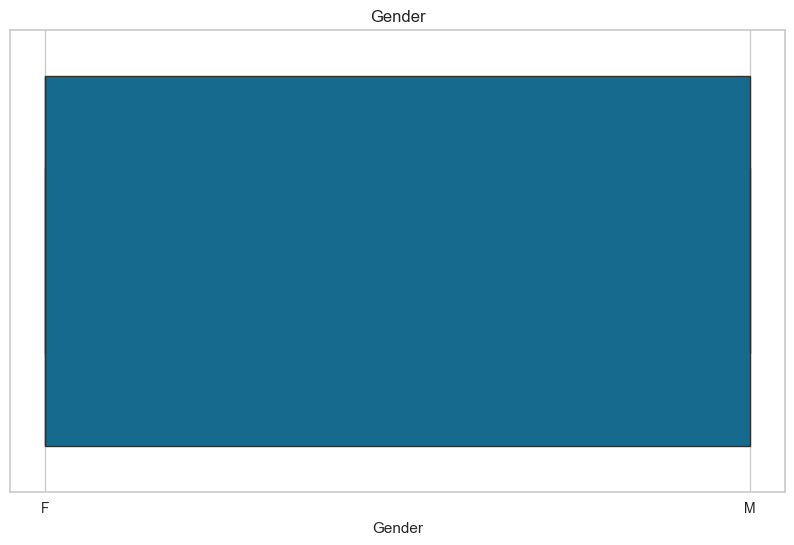

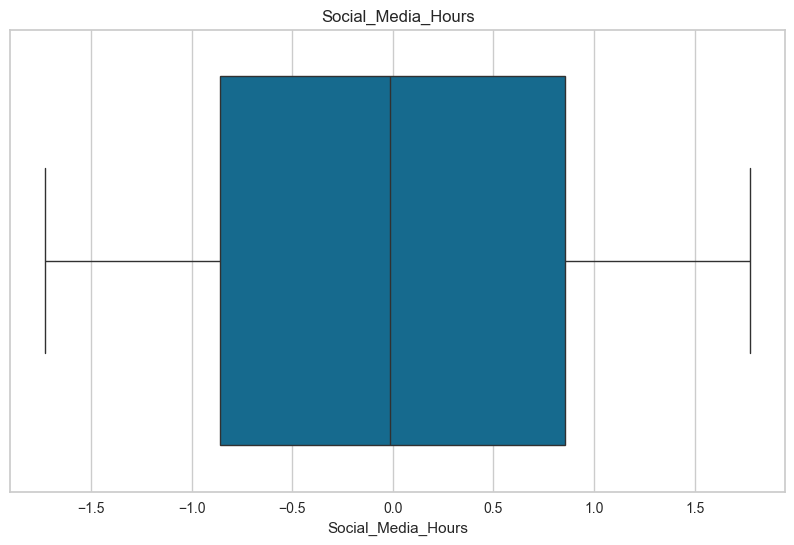

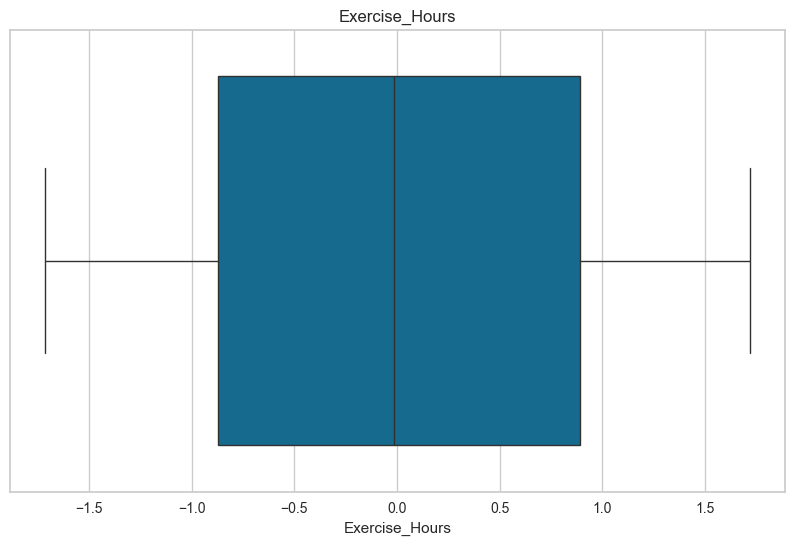

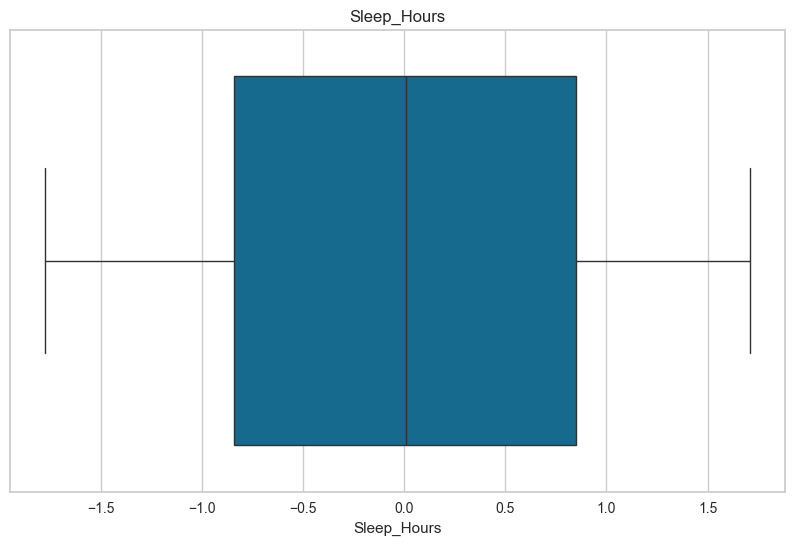

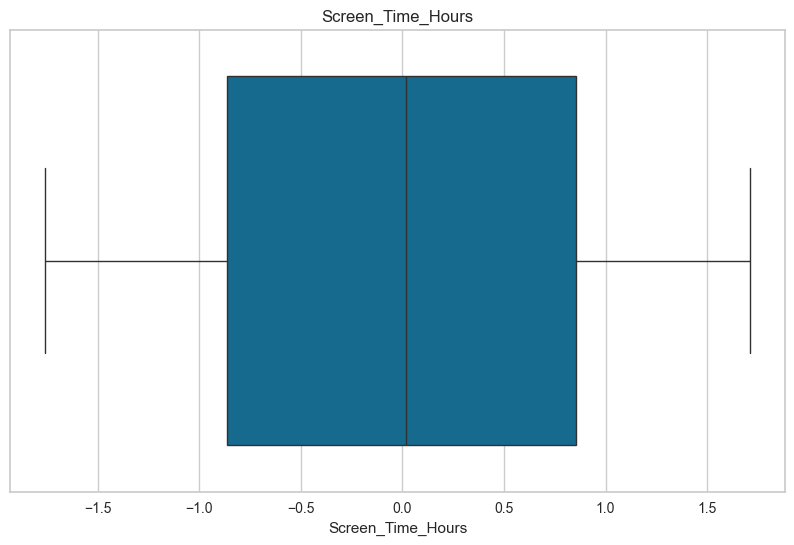

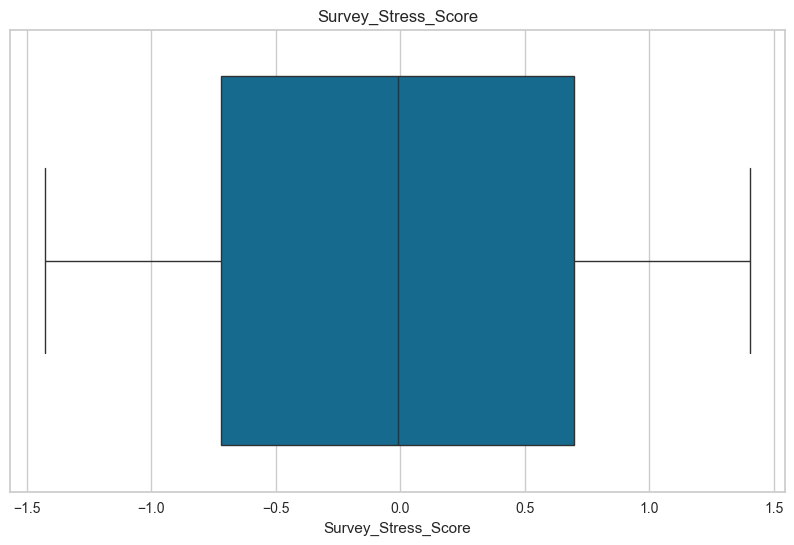

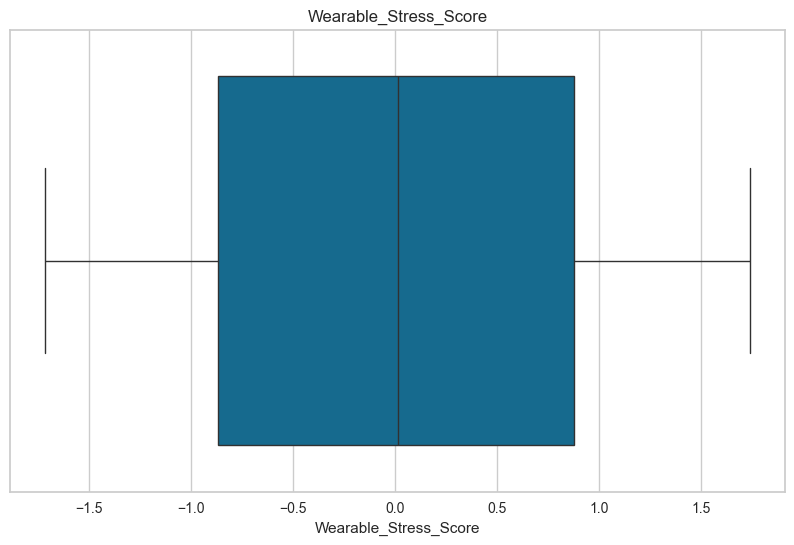

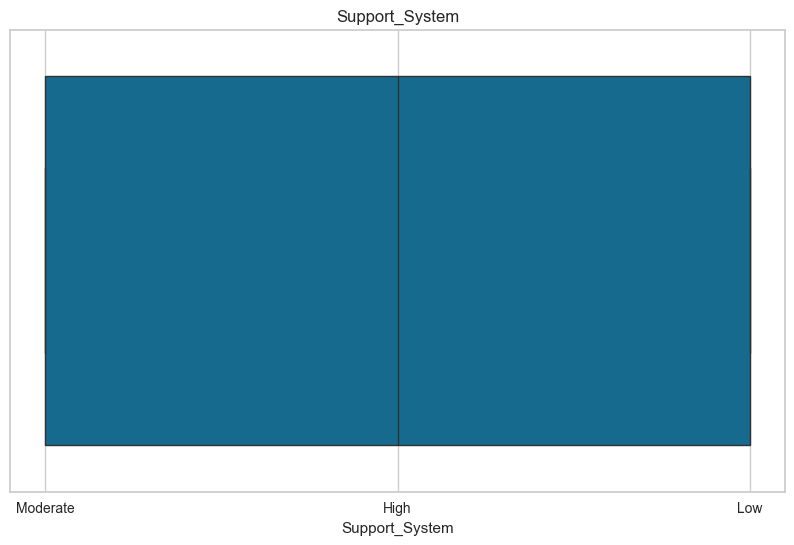

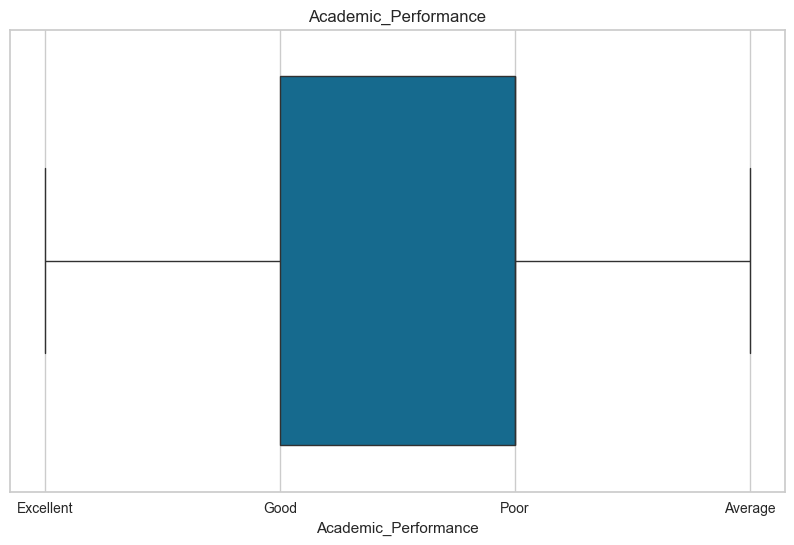


===== Label Encoding untuk Data Kategori ke Nominal =====

   User_ID       Age  Gender  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1  0.295514       0            1.654869        1.098356    -1.079212   
1        2  0.878611       1            1.480936       -1.265659     1.050340   
2        3 -0.287584       1            0.033878       -1.119161    -1.227774   
3        4  0.878611       0            1.057954       -0.544139    -1.042135   
4        5  0.878611       0           -1.252652       -0.312038    -0.500157   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           0.377898            -0.011169              -0.716698   
1          -0.664759             1.402638              -0.300863   
2           0.742471            -0.718073              -0.251193   
3           0.955543             1.402638               0.584673   
4           1.481115             1.402638               1.489070   

   Support_System  Academic_Performance  
0 

In [230]:
# Normalisasi atau Standarisasi Fitur
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Hasil sebelum normalisasi
plt.figure(figsize=(15, 10))

for i, feature in enumerate(cols_numerik, 1):
    plt.subplot(3, 3, i)  # Sesuaikan jumlah baris dan kolom
    sns.histplot(df_health[feature], kde=True)
    plt.title(f'{feature} (Sebelum Normalisasi)')
    plt.show()

df_normalized = df_health.copy()
scaler = StandardScaler()
df_normalized[cols_numerik]=scaler.fit_transform(df_normalized[cols_numerik])

# Hasil setelah normalisasi
plt.Figure(figsize=(10,6))

for i, feature in enumerate(cols_numerik, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_normalized[feature], kde=True)
    plt.title('Setelah Normalisasi')
    plt.show()

# Hapus outlier yang tersisa
before = df_normalized.shape[0]  # Jumlah data sebelum penghapusan

for feature in cols_numerik:
    Q1 = df_normalized[feature].quantile(0.25)
    Q3 = df_normalized[feature].quantile(0.75)
    IQR = Q3 - Q1
    condition = ~((df_normalized[feature] < (Q1 - 1.5 * IQR)) | (df_normalized[feature] > (Q3 + 1.5 * IQR)))
    df_normalized = df_normalized.loc[condition]
    df_health = df_health.loc[condition]

after = df_normalized.shape[0]  # Jumlah data setelah penghapusan
print(f"Jumlah outlier yang dihapus: {before - after}")

# cek dimensi antara data asli dan hasil normalisasi
print(df_health.info())
print(df_normalized.info())

# cek outlier setelah penghapusan
for feature in df_health.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_normalized[feature])
    plt.title(feature)
    plt.show()

# Encoding Data Kategorikal
categorical_cols = ['Gender', 'Support_System', 'Academic_Performance']
encoder = LabelEncoder()

for col in categorical_cols:
    df_normalized[col] = encoder.fit_transform(df_normalized[col])
print('\n===== Label Encoding untuk Data Kategori ke Nominal =====\n')
print(df_normalized.head())

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

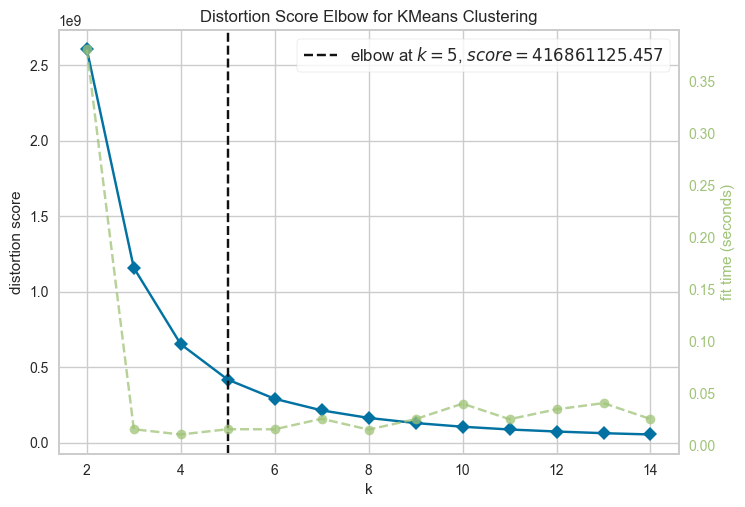

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [231]:
#Pembangunan model
#Menentukan parameter yang optimal dengan KElbow dan juga Silhouette Score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

KMeans_model = KMeans()
visualizer = KElbowVisualizer(KMeans_model, k=(2,15))
visualizer.fit(df_normalized)
visualizer.show()

In [232]:
from sklearn.decomposition import PCA

df_health_pca = PCA(n_components = 2).fit_transform(df_normalized)
df_health_pca

array([[-2.49949999e+03, -7.15323045e-01],
       [-2.49849998e+03,  3.25950234e-01],
       [-2.49750001e+03,  1.57383880e+00],
       ...,
       [ 2.49750001e+03,  2.11965101e-01],
       [ 2.49849998e+03, -1.49090188e+00],
       [ 2.49949998e+03, -4.21382551e-01]], shape=(5000, 2))

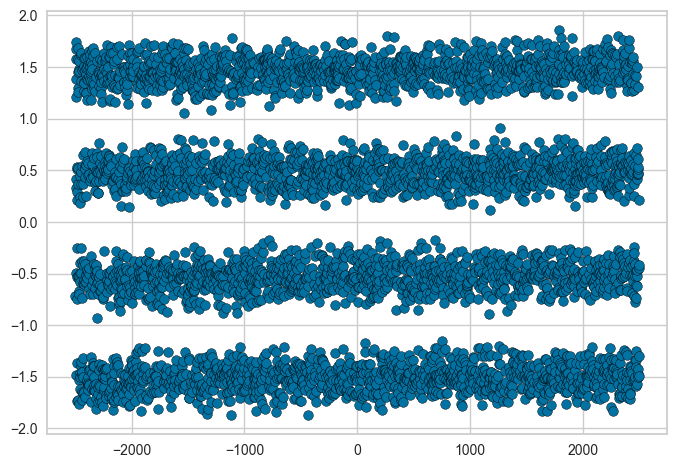

In [233]:
plt.scatter(df_health_pca[:,0], df_health_pca[:,1], edgecolor = 'black')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [245]:
from sklearn.metrics import silhouette_score

# Menentukan Jumlah Cluster Menggunakan Elbow Method dan Silhouette Score
wcss = []
silhouette_scores = []

K = range(2, 11)  # Uji untuk 2-10 cluster
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_health_pca)
    wcss.append(kmeans.inertia_)

    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(df_health_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

optimal_k = K[np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_health_pca)

df_normalized['Cluster'] = clusters

silhouette_avg = silhouette_score(df_health_pca, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Jumlah cluster optimal berdasarkan Silhouette Score: 2
Silhouette Score: 0.6266


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [93]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

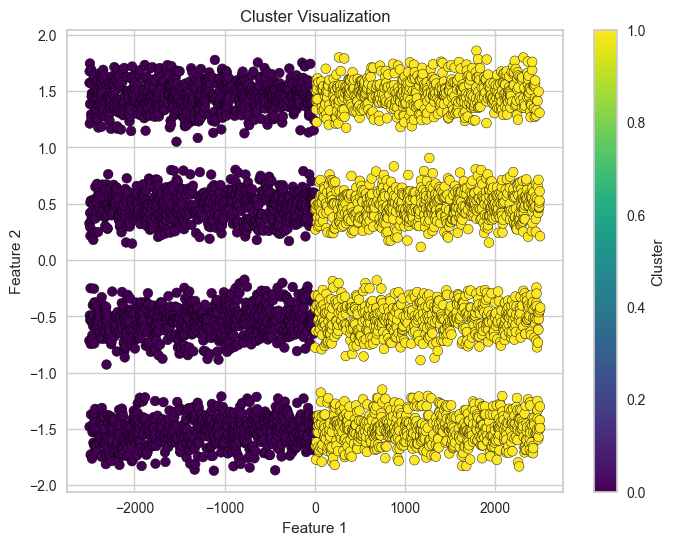

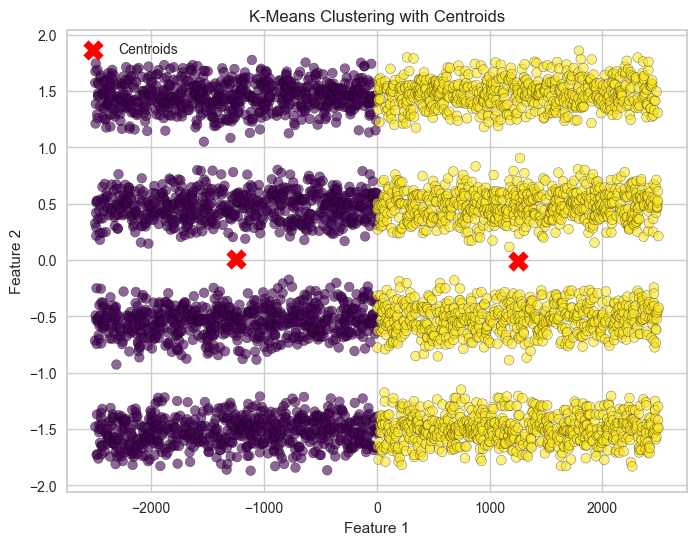

In [247]:
from sklearn.decomposition import PCA

plt.figure(figsize=(8,6))
plt.scatter(df_health_pca[:,0], df_health_pca[:,1], edgecolor = 'black', c=clusters, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Cluster Visualization")
plt.colorbar(label="Cluster")
plt.show()

centroids = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(df_health_pca[:,0], df_health_pca[:,1], c=clusters, cmap='viridis', edgecolor='black', alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering with Centroids")
plt.legend()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [248]:
df_normalized.head()

User_ID       Age  Gender  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1  0.295514       0            1.654869        1.098356    -1.079212   
1        2  0.878611       1            1.480936       -1.265659     1.050340   
2        3 -0.287584       1            0.033878       -1.119161    -1.227774   
3        4  0.878611       0            1.057954       -0.544139    -1.042135   
4        5  0.878611       0           -1.252652       -0.312038    -0.500157   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           0.377898            -0.011169              -0.716698   
1          -0.664759             1.402638              -0.300863   
2           0.742471            -0.718073              -0.251193   
3           0.955543             1.402638               0.584673   
4           1.481115             1.402638               1.489070   

   Support_System  Academic_Performance  Cluster  
0               2                     1        0  
1               2                     2        0  
2               2                     3        0  
3               2                     0        0  
4               0                     3        0

In [249]:
# Buat DataFrame baru untuk menyimpan hasil inverse transform
df_original = df_normalized.copy()

# Buat ulang encoder untuk tiap kolom
encoder_gender = LabelEncoder()
encoder_support = LabelEncoder()
encoder_academic = LabelEncoder()

# Fit encoder dengan data awal sebelum encoding
encoder_gender.fit(df_health['Gender'])
encoder_support.fit(df_health['Support_System'])
encoder_academic.fit(df_health['Academic_Performance'])

# Mengembalikan data ke bentuk asli
df_original['Gender'] = encoder_gender.inverse_transform(df_normalized['Gender'])
df_original['Support_System'] = encoder_support.inverse_transform(df_normalized['Support_System'])
df_original['Academic_Performance'] = encoder_academic.inverse_transform(df_normalized['Academic_Performance'])

# Cek hasil
print('\n===== Data Setelah Dikembalikan ke Bentuk Asli =====\n')
print(df_original.head())


===== Data Setelah Dikembalikan ke Bentuk Asli =====

   User_ID       Age Gender  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1  0.295514      F            1.654869        1.098356    -1.079212   
1        2  0.878611      M            1.480936       -1.265659     1.050340   
2        3 -0.287584      M            0.033878       -1.119161    -1.227774   
3        4  0.878611      F            1.057954       -0.544139    -1.042135   
4        5  0.878611      F           -1.252652       -0.312038    -0.500157   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           0.377898            -0.011169              -0.716698   
1          -0.664759             1.402638              -0.300863   
2           0.742471            -0.718073              -0.251193   
3           0.955543             1.402638               0.584673   
4           1.481115             1.402638               1.489070   

  Support_System Academic_Performance  Cluster  
0     

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [271]:
# Kembalikan fitur numerik ke skala aslinya
df_normalized[cols_numerik] = scaler.inverse_transform(df_normalized[cols_numerik])

# Cek apakah data numerik hanya berisi bilangan bulat
for col in cols_numerik:
    if df_normalized[col].dtype == 'float64' and (df_normalized[col] % 1 == 0).all():
        df_normalized[col] = df_normalized[col].astype(int)  # Konversi ke integer jika tidak ada angka desimal

# Cek hasil setelah inverse transform
print("\n===== Data Setelah Dikembalikan ke Bentuk Asli =====\n")
print(df_normalized.head())


===== Data Setelah Dikembalikan ke Bentuk Asli =====

   User_ID  Age  Gender  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1   16       0            9.654486        2.458001     5.198926   
1        2   17       1            9.158143        0.392095     8.866097   
2        3   15       1            5.028755        0.520119     4.943095   
3        4   17       0            7.951103        1.022630     5.262773   
4        5   17       0            1.357459        1.225462     6.196080   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           8.158189                    3               0.288962   
1           5.151993                    5               0.409446   
2           9.209325                    2               0.423837   
3           9.823658                    5               0.666021   
4          11.338990                    5               0.928060   

   Support_System  Academic_Performance  Cluster  
0               2           

In [250]:
# Kembalikan fitur numerik ke skala aslinya
df_original[cols_numerik] = scaler.inverse_transform(df_normalized[cols_numerik])

# Cek apakah data numerik hanya berisi bilangan bulat
for col in cols_numerik:
    if df_original[col].dtype == 'float64' and (df_original[col] % 1 == 0).all():
        df_original[col] = df_original[col].astype(int)  # Konversi ke integer jika tidak ada angka desimal

# Cek hasil setelah inverse transform
print("\n===== Data Setelah Dikembalikan ke Bentuk Asli =====\n")
print(df_original.head())


===== Data Setelah Dikembalikan ke Bentuk Asli =====

   User_ID  Age Gender  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1   16      F            9.654486        2.458001     5.198926   
1        2   17      M            9.158143        0.392095     8.866097   
2        3   15      M            5.028755        0.520119     4.943095   
3        4   17      F            7.951103        1.022630     5.262773   
4        5   17      F            1.357459        1.225462     6.196080   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           8.158189                    3               0.288962   
1           5.151993                    5               0.409446   
2           9.209325                    2               0.423837   
3           9.823658                    5               0.666021   
4          11.338990                    5               0.928060   

  Support_System Academic_Performance  Cluster  
0       Moderate            Excellen

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [262]:
# memastikan labels ditambahkan ke df_original
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_normalized[cols_numerik])
df_original['Cluster'] = labels

print(df_original['Cluster'].value_counts())

Cluster
0    1849
1    1585
2    1566
Name: count, dtype: int64



 Analisis Karakteristik Setiap Cluster (Data Numerik): 

Cluster 0:
Mean
Age                      15.409410
Social_Media_Hours        7.968050
Exercise_Hours            1.483603
Sleep_Hours               6.987297
Screen_Time_Hours         7.054960
Survey_Stress_Score       2.963764
Wearable_Stress_Score     0.486620
dtype: float64
Min
Age                      13.000000
Social_Media_Hours        4.518690
Exercise_Hours            0.000929
Sleep_Hours               4.006876
Screen_Time_Hours         2.000481
Survey_Stress_Score       1.000000
Wearable_Stress_Score     0.000391
dtype: float64
Max
Age                      18.000000
Social_Media_Hours        9.995052
Exercise_Hours            2.999020
Sleep_Hours               9.999229
Screen_Time_Hours        11.996563
Survey_Stress_Score       5.000000
Wearable_Stress_Score     0.999175
dtype: float64


Cluster 1:
Mean
Age                      15.444795
Social_Media_Hours        3.192219
Exercise_Hours            0.710141
Sleep_Hours    

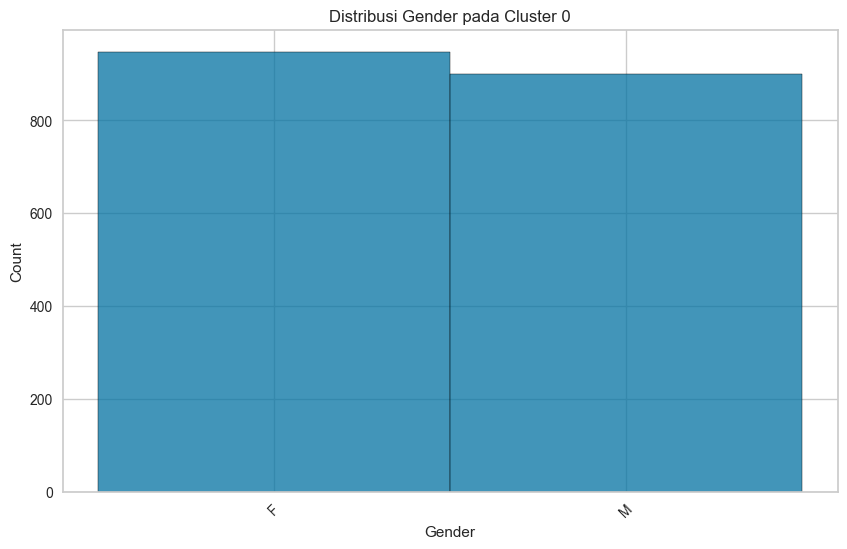

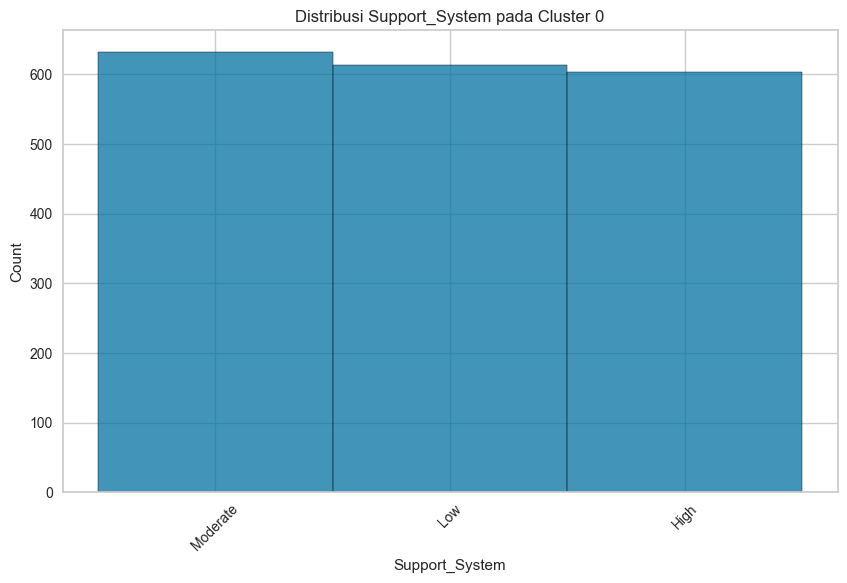

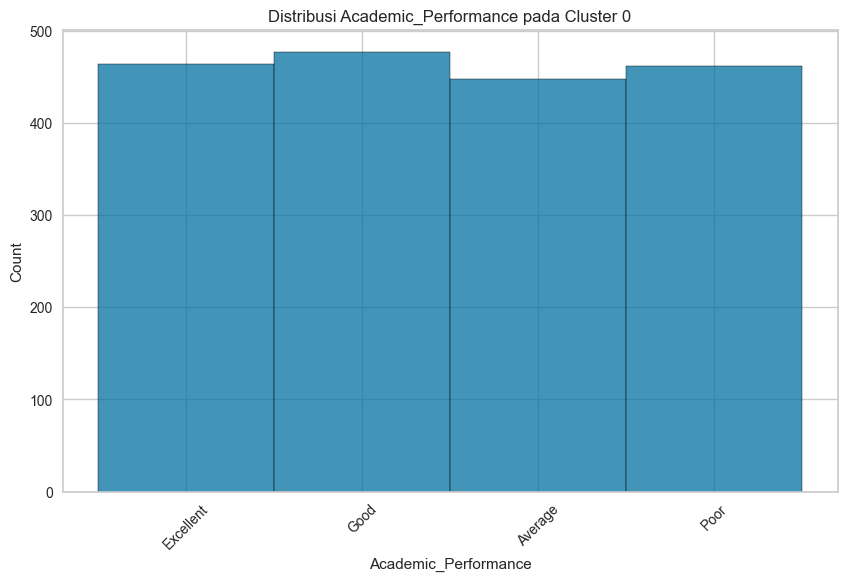

Cluster 1:
Modus
Gender                     F
Support_System          High
Academic_Performance    Poor
Name: 0, dtype: object




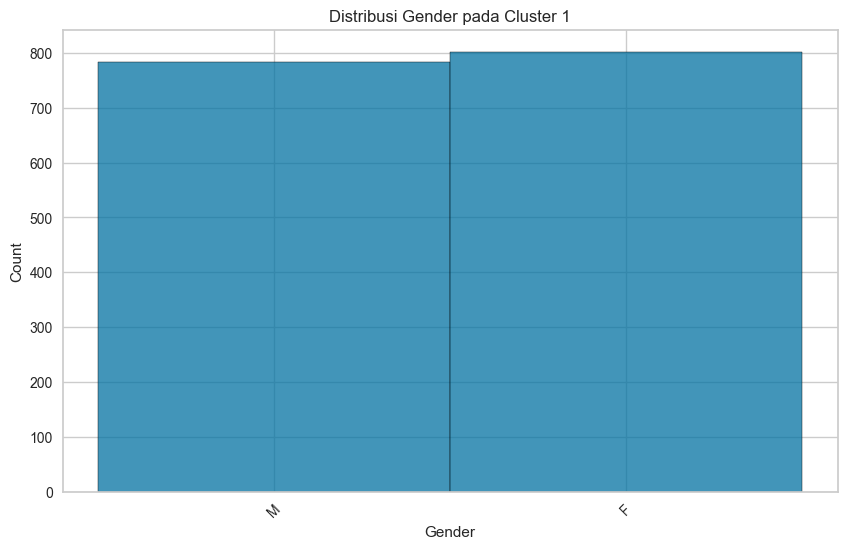

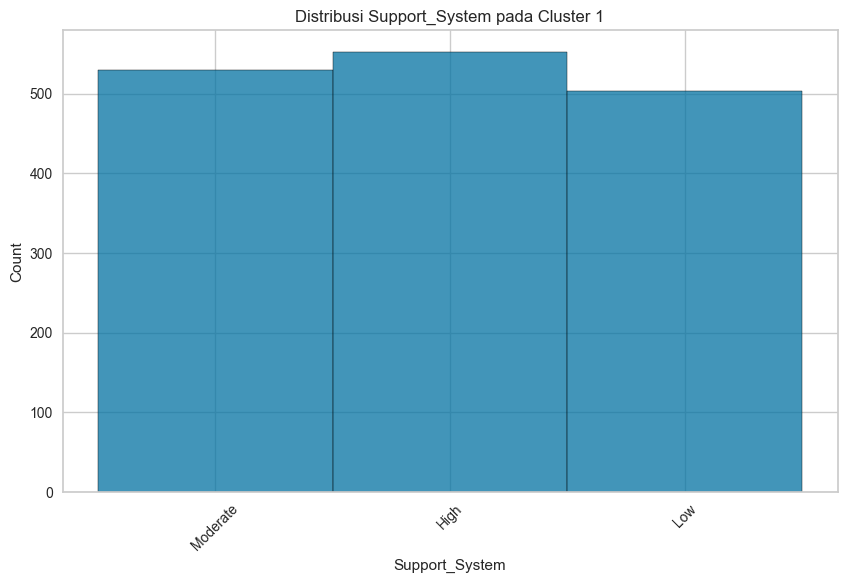

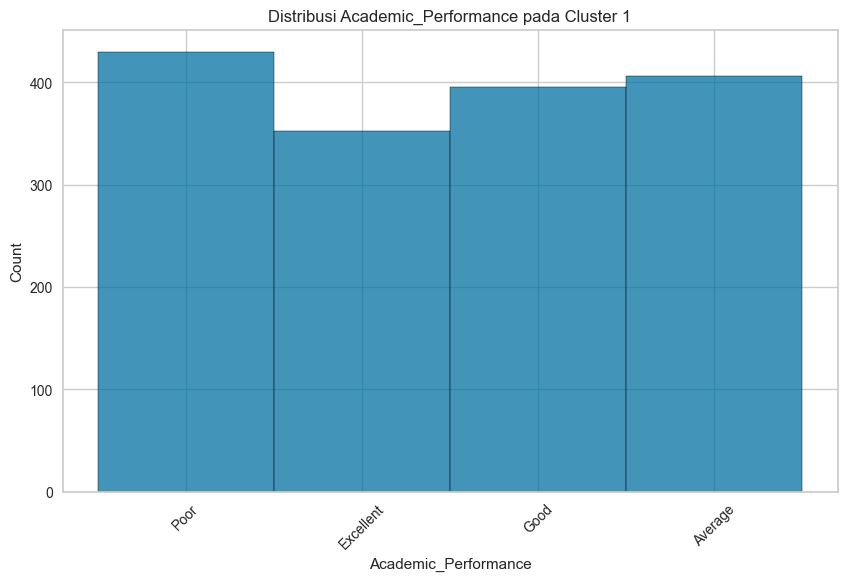

Cluster 2:
Modus
Gender                         M
Support_System          Moderate
Academic_Performance        Poor
Name: 0, dtype: object




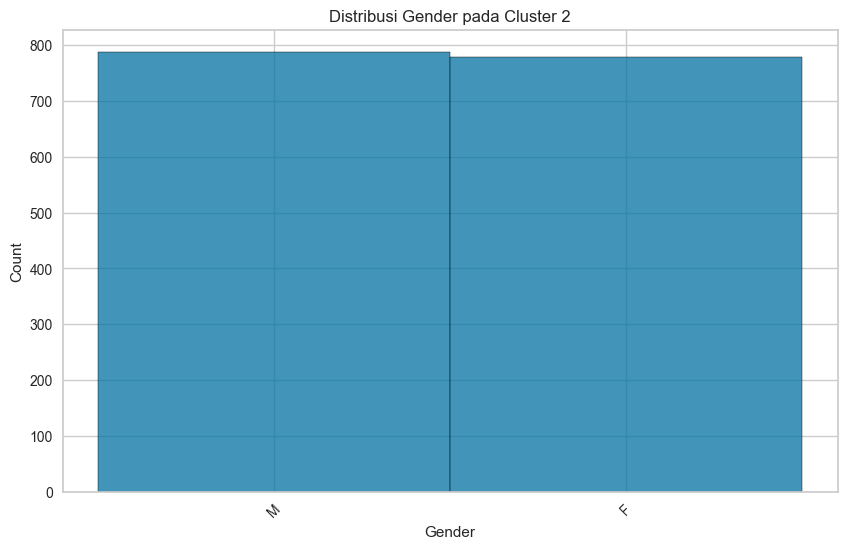

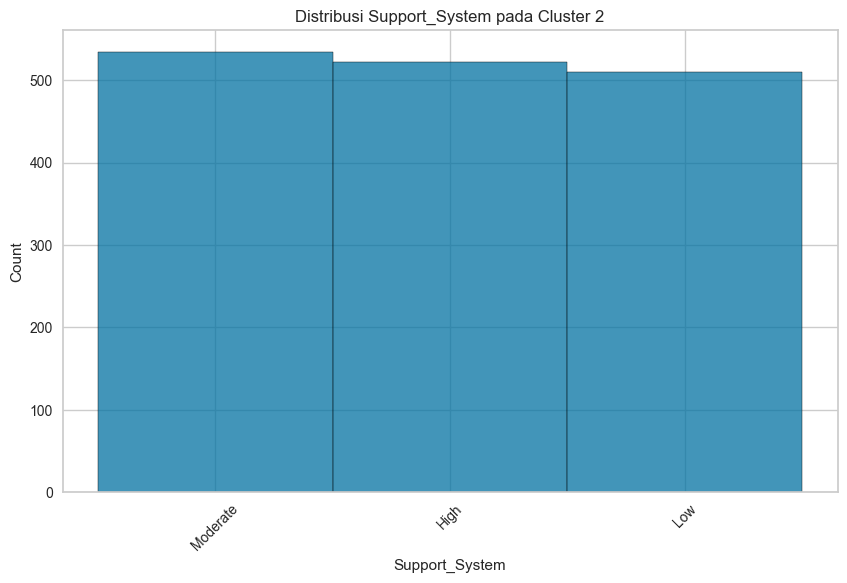

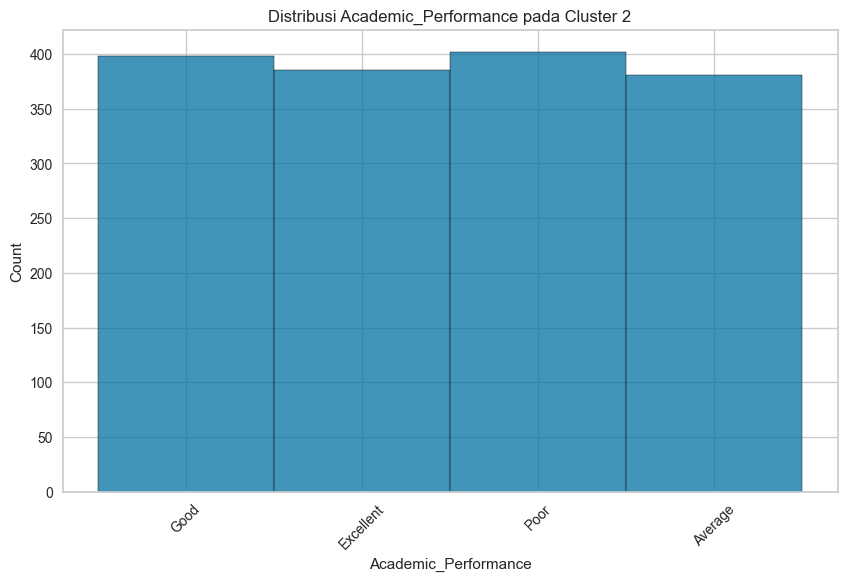

Cluster 3:
Modus
Tidak ada data




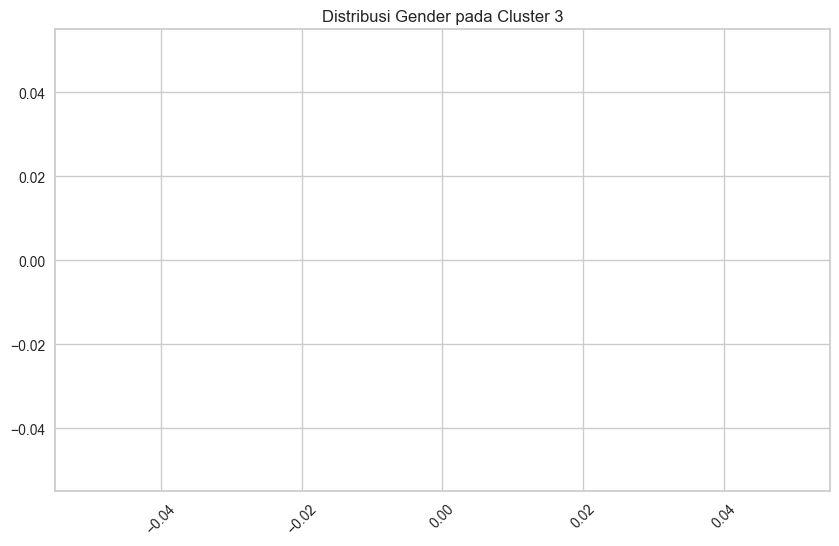

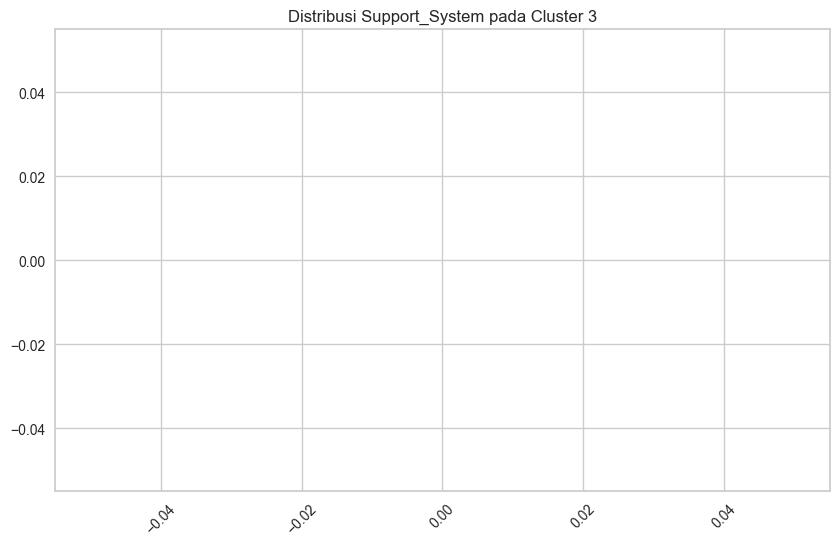

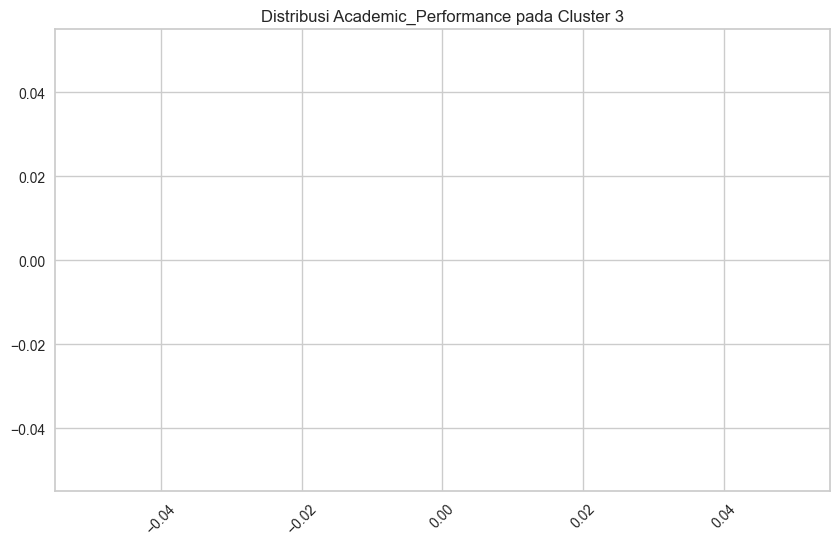

In [263]:
# Analisis karakteristik cluster
feature_for_analyze = ['Gender', 'Support_System', 'Academic_Performance']

def analyze_clusters(x, labels, k, feature_cols):
    print("\n Analisis Karakteristik Setiap Cluster (Data Numerik): \n")
    for cluster_id in range(k):
        cluster_data = x[x['Cluster'] == cluster_id][feature_cols]
        if not cluster_data.empty and not cluster_data.mode().empty:
            data_mean = cluster_data.mean()
            data_min = cluster_data.min()
            data_max = cluster_data.max()
        else:
            data_mean = "Tidak ada data"
            data_min = "Tidak ada data"
            data_max = "Tidak ada data"
        
        print(f"Cluster {cluster_id}:")
        print(f"Mean")
        print(data_mean)
        print(f"Min")
        print(data_min)
        print(f"Max")
        print(data_max)
        print("\n")

# Analisis karakteristik cluster untuk data kategorikal
def analyze_clusters_kategori(x, labels, k, feature_for_analyze):
    print("\n Analisis Karakteristik Setiap Cluster (Data Kategorikal): \n")
    for cluster_id in range(k):
        cluster_data = x[x['Cluster'] == cluster_id][feature_for_analyze]
        if not cluster_data.empty and not cluster_data.mode().empty:
            data_modus = cluster_data.mode().iloc[0]
        else:
            data_modus = "Tidak ada data"
        
        print(f"Cluster {cluster_id}:")
        print(f"Modus")
        print(data_modus)
        print("\n")

        for feature in feature_for_analyze:
            plt.figure(figsize=(10, 6))
            sns.histplot(cluster_data[feature], bins=len(cluster_data[feature].unique()), kde=False)
            plt.title(f'Distribusi {feature} pada Cluster {cluster_id}')
            plt.xticks(rotation=45)
            plt.show()

# Jalankan analisis
analyze_clusters(df_original, labels, 4, cols_numerik)
analyze_clusters_kategori(df_original, labels, 4, feature_for_analyze)

In [264]:
print(df_original['Cluster'].value_counts())

Cluster
0    1849
1    1585
2    1566
Name: count, dtype: int64


In [265]:
print(df_normalized['Cluster'].value_counts())

Cluster
0    2503
1    2497
Name: count, dtype: int64


Tulis hasil interpretasinya di sini.
1. Cluster 0:
  
   **Rata-Rata**
   - **Age :** 15
   - **Social_Media_Hours :** 7.96 / 8
   - **Exercise_Hours :** 1.48 / 1
   - **Sleep_Hours :** 6.98 / 7
   - **Screen_Time_Hours :** 7.05 / 7
   - **Survey_Stress_Score :** 2.96 / 3
   - **Wearable_Stress_Score :** 0.48 / 0.5

   **Nilai Minimun**
   - **Age :** 13
   - **Social_Media_Hours :** 4.51 / 5
   - **Exercise_Hours :** 0.00 / 0
   - **Sleep_Hours :** 4.0 / 4
   - **Screen_Time_Hours :** 2.0 / 2
   - **Survey_Stress_Score :** 1.0 /1
   - **Wearable_Stress_Score :** 0.00 /0

   **Nilai Maximum**
   - **Age :** 18
   - **Social_Media_Hours :** 9.99 / 10
   - **Exercise_Hours :** 2.99 / 3
   - **Sleep_Hours :** 9.99 / 10
   - **Screen_Time_Hours :** 11.99 / 12
   - **Survey_Stress_Score :** 5 / 5
   - **Wearable_Stress_Score :** 0.99 /1

   **Modus**
   - **Gender :** Female
   - **Support_System :** Moderate
   - **Academic_Performance :** Good
  
   **Analisis:**
    Berdasarkan hasil nilai diatas rata-rata paling banyak menggunakan sosial media paling lama pada usia 15 sebanyak 8 jam dan maksimum berusia 18 tahun selama bermain 10 jam. dan paling banyak penggunanya yaitu wanita. Namun, dalam academic mereka tetap bagus dan stress mereka rata-rata masih rendah.
  
3. Cluster 1:

   **Rata-Rata**
   - **Age :** 15
   - **Social_Media_Hours :** 3.19 / 3
   - **Exercise_Hours :** 0.71 / 1
   - **Sleep_Hours :** 6.91 / 7
   - **Screen_Time_Hours :** 6.88 / 7
   - **Survey_Stress_Score :** 3.09 / 3
   - **Wearable_Stress_Score :** 0.54 / 0.5

   **Nilai Minimun**
   - **Age :** 13
   - **Social_Media_Hours :** 0.00 / 0
   - **Exercise_Hours :** 0.00 / 0
   - **Sleep_Hours :** 4.0 / 4
   - **Screen_Time_Hours :** 2.0 / 2
   - **Survey_Stress_Score :** 1.0 /1
   - **Wearable_Stress_Score :** 0.00 /0

   **Nilai Maximum**
   - **Age :** 18
   - **Social_Media_Hours :** 7.57 / 7
   - **Exercise_Hours :** 1.93 / 2
   - **Sleep_Hours :** 9.99 / 10
   - **Screen_Time_Hours :** 11.99 / 12
   - **Survey_Stress_Score :** 5 / 5
   - **Wearable_Stress_Score :** 0.99 /1

   **Modus**
   - **Gender :** Female
   - **Support_System :** High
   - **Academic_Performance :** Poor
  
   **Analisis:**
    Berdasarkan hasil nilai diatas rata-rata paling banyak menggunakan sosial media paling lama pada usia 15 sebanyak 3 jam dan maksimum berusia 18 tahun selama bermain 8 jam. dan paling banyak penggunanya yaitu wanita. Namun, dalam academic mereka tetap cukup rendah dan stress mereka rata-rata masih tinggi.
 
5. Cluster 2:

   **Rata-Rata**
   - **Age :** 15
   - **Social_Media_Hours :** 3.10 / 3
   - **Exercise_Hours :** 2.31 / 2
   - **Sleep_Hours :** 7.27 / 7
   - **Screen_Time_Hours :** 7.26 / 7
   - **Survey_Stress_Score :** 2.96 / 3
   - **Wearable_Stress_Score :** 0.48 / 0.5

   **Nilai Minimun**
   - **Age :** 13
   - **Social_Media_Hours :** 0.00 / 0
   - **Exercise_Hours :** 1.18 / 1
   - **Sleep_Hours :** 4.0 / 4
   - **Screen_Time_Hours :** 2.0 / 2
   - **Survey_Stress_Score :** 1.0 /1
   - **Wearable_Stress_Score :** 0.00 /0

   **Nilai Maximum**
   - **Age :** 18
   - **Social_Media_Hours :** 8.13 / 8
   - **Exercise_Hours :** 2.99 / 3
   - **Sleep_Hours :** 9.99 / 10
   - **Screen_Time_Hours :** 11.99 / 12
   - **Survey_Stress_Score :** 5 / 5
   - **Wearable_Stress_Score :** 0.99 /1

   **Modus**
   - **Gender :** Male
   - **Support_System :** Moderate
   - **Academic_Performance :** Poor
  
   **Analisis:**
   Berdasarkan hasil nilai diatas rata-rata paling banyak menggunakan sosial media paling lama pada usia 15 sebanyak 3 jam dan maksimum berusia 18 tahun selama bermain 8 jam. dan paling banyak penggunanya yaitu laki-laki. Namun, dalam academic mereka cukup rendah dan stress mereka rata-rata tinggi.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [273]:
# Ekspor data hasil clustering ke CSV
df_normalized.to_csv("hasil_clustering.csv", index=False)

print("Data hasil clustering telah diekspor ke 'hasil_clustering.csv'.")

Data hasil clustering telah diekspor ke 'hasil_clustering.csv'.


In [274]:
# Ekspor data hasil inisiasi clustering ke CSV
df_original.to_csv("hasil_inisiasi_clustering.csv", index=False)

print("Data hasil clustering telah diekspor ke 'hasil_inisiasi_clustering.csv'.")

Data hasil clustering telah diekspor ke 'hasil_inisiasi_clustering.csv'.
